# Packages

In [10]:
!pip install pennylane-qiskit

In [1]:
import pennylane as qml
dev = qml.device('qiskit.aer', wires=2)

In [4]:
dev = qml.device('qiskit.aer', wires=2, backend='unitary_simulator')

In [5]:
dev.capabilities()['backend']

['aer_simulator',
 'aer_simulator_statevector',
 'aer_simulator_density_matrix',
 'aer_simulator_stabilizer',
 'aer_simulator_matrix_product_state',
 'aer_simulator_extended_stabilizer',
 'aer_simulator_unitary',
 'aer_simulator_superop',
 'qasm_simulator',
 'statevector_simulator',
 'unitary_simulator',
 'pulse_simulator']

# Example get unitary

In [89]:
import pennylane as qml
from pennylane import numpy as np

# we use 4 wires for a convolution window 2x2

# pixel discposition as in:

#########################
### theta_0 # theta_1 ###
### theta_2 # theta_3 ###
#########################

# theta is the angle of rotation around X axis
# the theta angle is mapped to the pixel value [0,1] in grey scale
# so that |psi>=cos(theta/2)|0>+sin(theta/2)|1>


wires = 4 
dev = qml.device("default.qubit", wires=wires)

E_x_y =[(0,1, 1.0),
       (1,2, 1.0),
       (2,3, 1.0),
       (3,0, 1.0)]

def circuit(theta_0, theta_1, theta_2, theta_3, phi1): 
    qml.RX(theta_0, wires=0) 
    qml.RX(theta_1, wires=1)
    qml.RX(theta_2, wires=1)
    qml.RX(theta_3, wires=1)
    
    qml.Hadamard(wires=0)
    qml.Hadamard(wires=1)
    qml.Hadamard(wires=2)
    qml.Hadamard(wires=3)
    
    qml.IsingXX(np.pi * phi1, wires=[0,1])
    qml.IsingZZ(np.pi * phi1, wires=[0,1])
    
    qml.IsingXX(np.pi * phi1, wires=[1,2])
    qml.IsingZZ(np.pi * phi1, wires=[1,2])
    
    qml.IsingXX(np.pi * phi1, wires=[2,3])
    qml.IsingZZ(np.pi * phi1, wires=[2,3])
    
    qml.IsingXX(np.pi * phi1, wires=[3,0])
    qml.IsingZZ(np.pi * phi1, wires=[3,0])

def find_unitary(template, *args, **kwargs):
    
    @qml.qnode(dev)
    def find_output_state(input_state):
        qml.QubitStateVector(input_state, wires=range(wires))
        template(*args, **kwargs)
        return qml.state()
    input_states = np.eye(2 ** wires)   # initializes the state to |0> and |1>
    return np.stack([find_output_state(state) for state in input_states]).T

In [10]:
U = find_unitary(circuit, 120, 100, 120, 100, 89)
print(U)

[[ 0.24902129-0.02209968j  0.24902129-0.02209968j  0.24902129-0.02209968j
   0.24902129-0.02209968j  0.24902129-0.02209968j  0.24902129-0.02209968j
   0.24902129-0.02209968j  0.24902129-0.02209968j  0.24902129-0.02209968j
   0.24902129-0.02209968j  0.24902129-0.02209968j  0.24902129-0.02209968j
   0.24902129-0.02209968j  0.24902129-0.02209968j  0.24902129-0.02209968j
   0.24902129-0.02209968j]
 [ 0.24902129-0.02209968j -0.24902129+0.02209968j  0.24902129-0.02209968j
  -0.24902129+0.02209968j  0.24902129-0.02209968j -0.24902129+0.02209968j
   0.24902129-0.02209968j -0.24902129+0.02209968j  0.24902129-0.02209968j
  -0.24902129+0.02209968j  0.24902129-0.02209968j -0.24902129+0.02209968j
   0.24902129-0.02209968j -0.24902129+0.02209968j  0.24902129-0.02209968j
  -0.24902129+0.02209968j]
 [ 0.24902129-0.02209968j  0.24902129-0.02209968j -0.24902129+0.02209968j
  -0.24902129+0.02209968j  0.24902129-0.02209968j  0.24902129-0.02209968j
  -0.24902129+0.02209968j -0.24902129+0.02209968j  0.24902

In [11]:
np.shape(U)

(16, 16)

In [499]:
reals = np.real(U)
imag  = np.imag(U)

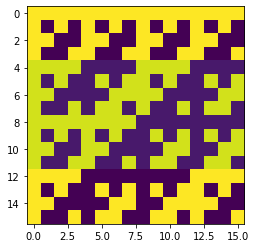

In [500]:
import matplotlib.pyplot as plt
plt.imshow(reals)
plt.show()

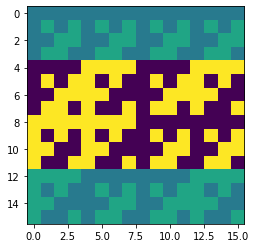

In [501]:
import matplotlib.pyplot as plt
plt.imshow(imag)
plt.show()

In [502]:
U1 = find_unitary(circuit, 120, 100, 120, 99, 89) # muy parecido cambiando solo un pixel
print(U1)

[[ 0.22913189+0.09999288j  0.22913189+0.09999288j  0.22913189+0.09999288j
   0.22913189+0.09999288j  0.22913189+0.09999288j  0.22913189+0.09999288j
   0.22913189+0.09999288j  0.22913189+0.09999288j  0.22913189+0.09999288j
   0.22913189+0.09999288j  0.22913189+0.09999288j  0.22913189+0.09999288j
   0.22913189+0.09999288j  0.22913189+0.09999288j  0.22913189+0.09999288j
   0.22913189+0.09999288j]
 [ 0.22913189+0.09999288j -0.22913189-0.09999288j  0.22913189+0.09999288j
  -0.22913189-0.09999288j  0.22913189+0.09999288j -0.22913189-0.09999288j
   0.22913189+0.09999288j -0.22913189-0.09999288j  0.22913189+0.09999288j
  -0.22913189-0.09999288j  0.22913189+0.09999288j -0.22913189-0.09999288j
   0.22913189+0.09999288j -0.22913189-0.09999288j  0.22913189+0.09999288j
  -0.22913189-0.09999288j]
 [ 0.22913189+0.09999288j  0.22913189+0.09999288j -0.22913189-0.09999288j
  -0.22913189-0.09999288j  0.22913189+0.09999288j  0.22913189+0.09999288j
  -0.22913189-0.09999288j -0.22913189-0.09999288j  0.22913

In [503]:
reals1 = np.real(U1)
imag1 = np.imag(U1)

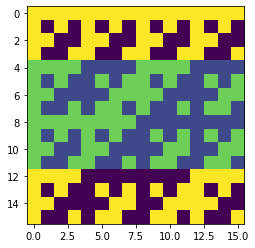

In [504]:
import matplotlib.pyplot as plt
plt.imshow(reals1)
plt.show()

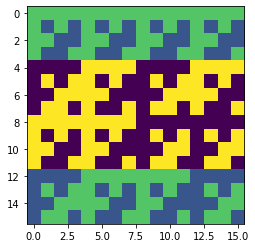

In [505]:
import matplotlib.pyplot as plt
plt.imshow(imag1)
plt.show()

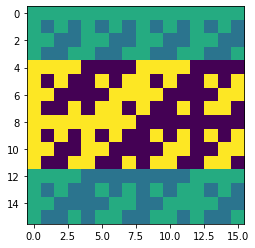

In [506]:
# we substract both images

substract_reals = cv2.subtract(reals,reals1)
plt.imshow(substract_reals)
plt.show()

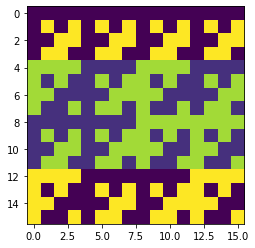

In [507]:
substract_reals = cv2.subtract(imag,imag1)
plt.imshow(substract_reals)
plt.show()

# Q Convolution of one image to higher Hilbert space

In [11]:
import splitfolders  # or import split_folders
splitfolders.ratio('/Users/h4/Desktop/IFAC/Descascarillador', 
                   output='/Users/h4/Desktop/IFAC/Descascarillador_split', 
                   seed=1337, ratio=(.8, 0.1,0.1)) # default values

Copying files: 151 files [00:00, 557.51 files/s]


In [90]:
n_epochs = 50   # Number of optimization epochs
n_layers = 1    # Number of random layers
n_train  = 50    # Size of the train dataset
n_val    = 30     # Size of the validation dataset
n_test   = 30     # Size of the test dataset

SAVE_PATH = "/Users/h4/desktop/IFAC/Q" # Data saving folder
PREPROCESS = True           # If False, skip quantum processing and load data from SAVE_PATH
np.random.seed(0)           # Seed for NumPy random number generator
tf.random.set_seed(0)       # Seed for TensorFlow random number generator

[[[[  0]
   [  1]
   [  1]
   ...
   [  0]
   [  0]
   [  0]]

  [[  0]
   [  1]
   [  1]
   ...
   [  0]
   [  0]
   [  0]]

  [[  1]
   [  1]
   [  1]
   ...
   [163]
   [ 93]
   [  0]]

  ...

  [[ 62]
   [ 63]
   [ 60]
   ...
   [  0]
   [  0]
   [  0]]

  [[ 59]
   [ 58]
   [ 50]
   ...
   [  0]
   [  0]
   [  0]]

  [[ 51]
   [ 31]
   [ 27]
   ...
   [  0]
   [  0]
   [  0]]]]
[[[[  0]
   [  1]
   [  1]
   ...
   [  0]
   [  0]
   [  0]]

  [[  1]
   [  1]
   [  1]
   ...
   [  0]
   [  0]
   [  0]]

  [[  1]
   [  1]
   [  1]
   ...
   [  1]
   [237]
   [  0]]

  ...

  [[ 55]
   [ 56]
   [ 51]
   ...
   [  0]
   [  0]
   [  0]]

  [[ 49]
   [ 49]
   [ 49]
   ...
   [  0]
   [  0]
   [  0]]

  [[ 47]
   [ 32]
   [ 24]
   ...
   [  0]
   [  0]
   [  0]]]]
[[[[  0]
   [  0]
   [  0]
   ...
   [  0]
   [  0]
   [  0]]

  [[  0]
   [  0]
   [  0]
   ...
   [  0]
   [  0]
   [  0]]

  [[  0]
   [  0]
   [  0]
   ...
   [126]
   [237]
   [  0]]

  ...

  [[ 43]
   [109]
   [107]
   ..

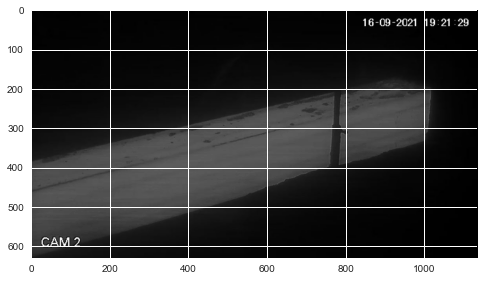

In [91]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

###
DATADIR = "/Users/h4/Desktop/IFAC/Descascarillador_split/train/Class1_Bad"
IMG_SIZE=64

path = os.path.join(DATADIR)

training_data = []

def create_training_data():
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
        training_data.append([new_array, 0])  

create_training_data()

train_Class1_Bad = training_data

X = []
y = []

for features,label in train_Class1_Bad:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X_train_Class1_Bad = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_train_Class1_Bad = y

###
DATADIR = "/Users/h4/Desktop/IFAC/Descascarillador_split/train/Class2_Good"
IMG_SIZE=64

path = os.path.join(DATADIR)

training_data = []

def create_training_data():
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
        training_data.append([new_array, 1])  

create_training_data()

train_Class2_Good = training_data

X = []
y = []

for features,label in train_Class2_Good:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X_train_Class2_Good = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_train_Class2_Good = y

###
DATADIR = "/Users/h4/Desktop/IFAC/Descascarillador_split/val/Class1_Bad"
IMG_SIZE=64

path = os.path.join(DATADIR)

training_data = []

def create_training_data():
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
        training_data.append([new_array, 0])  

create_training_data()

val_Class1_Bad = training_data

X = []
y = []

for features,label in val_Class1_Bad:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X_val_Class1_Bad = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_val_Class1_Bad = y


###
DATADIR = "/Users/h4/Desktop/IFAC/Descascarillador_split/val/Class2_Good"
IMG_SIZE=64

path = os.path.join(DATADIR)

training_data = []

def create_training_data():
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
        training_data.append([new_array, 1])  

create_training_data()

Class2_Good = training_data

X = []
y = []

for features,label in Class2_Good:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X_val_Class2_Good = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_val_Class2_Good = y


###
DATADIR = "/Users/h4/Desktop/IFAC/Descascarillador_split/test/Class1_Bad"
IMG_SIZE=64

path = os.path.join(DATADIR)

training_data = []

def create_test_data():
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
        training_data.append([new_array, 0])  

create_test_data()

test_Class1_Bad = training_data

X = []
y = []

for features,label in test_Class1_Bad:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X_test_Class1_Bad = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_test_Class1_Bad = y

###
DATADIR = "/Users/h4/Desktop/IFAC/Descascarillador_split/test/Class2_Good"
IMG_SIZE=64

path = os.path.join(DATADIR)

test_data = []

def create_test_data():
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
        training_data.append([new_array, 1])  

create_test_data()

test_Class2_Good = training_data

X = []
y = []

for features,label in test_Class2_Good:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X_test_Class2_Good = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_test_Class2_Good = y



In [92]:
def unison_shuffled_copies(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]

X_train = np.concatenate((X_train_Class1_Bad, X_train_Class2_Good), axis=0)
y_train = np.concatenate((y_train_Class1_Bad, y_train_Class2_Good), axis=0)

X_val = np.concatenate((X_val_Class1_Bad, X_val_Class2_Good), axis=0)
y_val = np.concatenate((y_val_Class1_Bad, y_val_Class2_Good), axis=0)

X_test = np.concatenate((X_test_Class1_Bad, X_test_Class2_Good), axis=0)
y_test = np.concatenate((y_test_Class1_Bad, y_test_Class2_Good), axis=0)

X_train, y_train = unison_shuffled_copies(X_train, y_train)
X_val, y_val = unison_shuffled_copies(X_val, y_val)
X_test, y_test = unison_shuffled_copies(X_test, y_test)

In [93]:
# Reduce dataset size
train_images = X_train[:n_train]
train_labels = y_train[:n_train]

val_images = X_val[:n_val]
val_labels = y_val[:n_val]

test_images = X_test[:n_test]
test_labels = y_test[:n_test]

# Normalize pixel values within 0 and 1
train_images = train_images / 255
val_images = val_images / 255
test_images = test_images / 255

# Add extra dimension for convolution channels
train_images = np.array(train_images[..., tf.newaxis])
val_images = np.array(val_images[..., tf.newaxis])
test_images = np.array(test_images[..., tf.newaxis])

In [94]:
import tensorflow as tf

def quantum_higher_convolution(image):
    empty_U = np.array([])
    U1 = np.array([])
    for j in range(0, 64, 2):
        for k in range(0, 64, 2):
            # Process a squared 2x2 region of the image with a quantum circuit
            U = find_unitary(circuit, 
                             image[j , k, 0],
                             image[j, k + 1, 0],
                             image[j + 1, k, 0],
                             image[j + 1, k + 1, 0],
                             0)
            U1 = np.append(U1,U)
    return [np.real(U1), np.imag(U1)]

In [95]:
    if PREPROCESS == True:
        q_train_images = []
        print("Quantum pre-processing of train images:")
        for idx, img in enumerate(train_images):
            print("{}/{}        ".format(idx + 1, n_train), end="\r")
            q_train_images.append(quantum_higher_convolution(img))
        q_train_images = np.asarray(q_train_images)

        q_test_images = []
        print("\nQuantum pre-processing of test images:")
        for idx, img in enumerate(test_images):
            print("{}/{}        ".format(idx + 1, n_test), end="\r")
            q_test_images.append(quantum_higher_convolution(img))
        q_test_images = np.asarray(q_test_images)

        q_val_images = []
        print("\nQuantum pre-processing of validation images:")
        for idx, img in enumerate(val_images):
            print("{}/{}        ".format(idx + 1, n_val), end="\r")
            q_val_images.append(quantum_higher_convolution(img))
        q_val_images = np.asarray(q_val_images)

        # Save pre-processed images
        np.save(SAVE_PATH + "q_train_images.npy", q_train_images)
        np.save(SAVE_PATH + "q_val_images.npy", q_val_images)
        np.save(SAVE_PATH + "q_test_images.npy", q_test_images)


    # Load pre-processed images
    q_train_images = np.load(SAVE_PATH + "q_train_images.npy")
    q_val_images = np.load(SAVE_PATH + "q_val_images.npy")
    q_test_images = np.load(SAVE_PATH + "q_test_images.npy")

Quantum pre-processing of train images:
50/50        
Quantum pre-processing of test images:
24/30        
Quantum pre-processing of validation images:


In [96]:
import tensorflow as tf
import tensorflow.keras.backend as K
# from keras import backend as K
from sklearn.metrics import roc_auc_score

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

def MyModel():
    """Initializes and returns a custom Keras model
    which is ready to be trained."""
    model = keras.models.Sequential([
        keras.layers.Flatten(),
        keras.layers.Dense(512, activation="relu"),        
        keras.layers.Dense(32, activation="relu"),        
        keras.layers.Dense(2, activation="softmax")
    ])

    model.compile(
        optimizer='adam',
        loss="sparse_categorical_crossentropy",
        metrics=[["accuracy"],f1_m,precision_m, recall_m],
    )
    return model

In [ ]:
q_model = MyModel()

q_history = q_model.fit(
    q_train_images,
    train_labels,
    validation_data=(q_val_images, val_labels),
    batch_size=2,
    epochs=300,
    verbose=1,
)

Epoch 1/300
25/25 [==============================] - 28s 887ms/step - loss: 22.8833 - accuracy: 0.5200 - f1_m: 0.6533 - precision_m: 0.5600 - recall_m: 0.8400 - val_loss: 13.2941 - val_accuracy: 0.5333 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 2/300
25/25 [==============================] - 23s 918ms/step - loss: 26.1752 - accuracy: 0.5000 - f1_m: 0.6533 - precision_m: 0.5600 - recall_m: 0.8400 - val_loss: 29.6617 - val_accuracy: 0.5333 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 3/300
25/25 [==============================] - 22s 879ms/step - loss: 19.0947 - accuracy: 0.6200 - f1_m: 0.6667 - precision_m: 0.5600 - recall_m: 0.8800 - val_loss: 0.9850 - val_accuracy: 0.9667 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 4/300
25/25 [==============================] - 22s 893ms/step - loss: 4.2481 - accuracy: 0.5400 - f1_m: 0.6267 - precision_m: 0.5600 - recall_m: 0.7600 - val_loss: 4.6016 - val_accuracy

25/25 [==============================] - 22s 875ms/step - loss: 0.1400 - accuracy: 0.9400 - f1_m: 0.6400 - precision_m: 0.5600 - recall_m: 0.8000 - val_loss: 0.2162 - val_accuracy: 0.9667 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 62/300
25/25 [==============================] - 22s 875ms/step - loss: 0.3268 - accuracy: 0.8400 - f1_m: 0.6667 - precision_m: 0.5600 - recall_m: 0.8800 - val_loss: 0.2660 - val_accuracy: 0.9000 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 63/300
25/25 [==============================] - 22s 867ms/step - loss: 0.2404 - accuracy: 0.9000 - f1_m: 0.6533 - precision_m: 0.5600 - recall_m: 0.8400 - val_loss: 0.3011 - val_accuracy: 0.8333 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 64/300
25/25 [==============================] - 22s 876ms/step - loss: 0.4147 - accuracy: 0.8600 - f1_m: 0.6133 - precision_m: 0.5600 - recall_m: 0.7200 - val_loss: 0.2040 - val_accuracy: 0.9667 - val

25/25 [==============================] - 21s 840ms/step - loss: 0.6866 - accuracy: 0.5600 - f1_m: 0.6267 - precision_m: 0.5600 - recall_m: 0.7600 - val_loss: 0.6995 - val_accuracy: 0.5333 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 122/300
25/25 [==============================] - 21s 862ms/step - loss: 0.6866 - accuracy: 0.5600 - f1_m: 0.6400 - precision_m: 0.5600 - recall_m: 0.8000 - val_loss: 0.6997 - val_accuracy: 0.5333 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 123/300
25/25 [==============================] - 22s 864ms/step - loss: 0.6863 - accuracy: 0.5600 - f1_m: 0.6267 - precision_m: 0.5600 - recall_m: 0.7600 - val_loss: 0.6998 - val_accuracy: 0.5333 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 124/300
25/25 [==============================] - 22s 878ms/step - loss: 0.6863 - accuracy: 0.5600 - f1_m: 0.6533 - precision_m: 0.5600 - recall_m: 0.8400 - val_loss: 0.6997 - val_accuracy: 0.5333 - 

In [98]:
c_model = MyModel()

c_history = c_model.fit(
    train_images,
    train_labels,
    validation_data=(val_images, val_labels),
    batch_size=2,
    epochs=500,
    verbose=1,
)

Epoch 1/500
25/25 [==============================] - 1s 19ms/step - loss: 0.7113 - accuracy: 0.5800 - f1_m: 0.6533 - precision_m: 0.5600 - recall_m: 0.8400 - val_loss: 0.5950 - val_accuracy: 0.6000 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 2/500
25/25 [==============================] - 0s 9ms/step - loss: 0.5609 - accuracy: 0.7400 - f1_m: 0.6533 - precision_m: 0.5600 - recall_m: 0.8400 - val_loss: 0.4389 - val_accuracy: 0.9000 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 3/500
25/25 [==============================] - 0s 9ms/step - loss: 0.4926 - accuracy: 0.8000 - f1_m: 0.6667 - precision_m: 0.5600 - recall_m: 0.8800 - val_loss: 0.3443 - val_accuracy: 0.9667 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 4/500
25/25 [==============================] - 0s 9ms/step - loss: 0.3441 - accuracy: 0.8400 - f1_m: 0.6267 - precision_m: 0.5600 - recall_m: 0.7600 - val_loss: 0.3033 - val_accuracy: 0.9667 - val_f

Epoch 32/500
25/25 [==============================] - 0s 9ms/step - loss: 0.4256 - accuracy: 0.9000 - f1_m: 0.6533 - precision_m: 0.5600 - recall_m: 0.8400 - val_loss: 0.1619 - val_accuracy: 0.9667 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 33/500
25/25 [==============================] - 0s 10ms/step - loss: 0.1044 - accuracy: 0.9600 - f1_m: 0.6267 - precision_m: 0.5600 - recall_m: 0.7600 - val_loss: 0.1367 - val_accuracy: 0.9667 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 34/500
25/25 [==============================] - 0s 10ms/step - loss: 0.0399 - accuracy: 0.9800 - f1_m: 0.6400 - precision_m: 0.5600 - recall_m: 0.8000 - val_loss: 0.2029 - val_accuracy: 0.9667 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 35/500
25/25 [==============================] - 0s 10ms/step - loss: 0.0759 - accuracy: 0.9600 - f1_m: 0.6533 - precision_m: 0.5600 - recall_m: 0.8400 - val_loss: 0.1273 - val_accuracy: 0.9333 -

Epoch 63/500
25/25 [==============================] - 0s 8ms/step - loss: 5.8377e-04 - accuracy: 1.0000 - f1_m: 0.6533 - precision_m: 0.5600 - recall_m: 0.8400 - val_loss: 0.1806 - val_accuracy: 0.9667 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 64/500
25/25 [==============================] - 0s 8ms/step - loss: 5.6523e-04 - accuracy: 1.0000 - f1_m: 0.6133 - precision_m: 0.5600 - recall_m: 0.7200 - val_loss: 0.1733 - val_accuracy: 0.9667 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 65/500
25/25 [==============================] - 0s 8ms/step - loss: 5.7083e-04 - accuracy: 1.0000 - f1_m: 0.6667 - precision_m: 0.5600 - recall_m: 0.8800 - val_loss: 0.1823 - val_accuracy: 0.9667 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 66/500
25/25 [==============================] - 0s 8ms/step - loss: 4.8833e-04 - accuracy: 1.0000 - f1_m: 0.6267 - precision_m: 0.5600 - recall_m: 0.7600 - val_loss: 0.1735 - val_accur

25/25 [==============================] - 0s 9ms/step - loss: 9.3857e-05 - accuracy: 1.0000 - f1_m: 0.6267 - precision_m: 0.5600 - recall_m: 0.7600 - val_loss: 0.2032 - val_accuracy: 0.9667 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 124/500
25/25 [==============================] - 0s 10ms/step - loss: 9.5221e-05 - accuracy: 1.0000 - f1_m: 0.6533 - precision_m: 0.5600 - recall_m: 0.8400 - val_loss: 0.2096 - val_accuracy: 0.9667 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 125/500
25/25 [==============================] - 0s 10ms/step - loss: 9.6591e-05 - accuracy: 1.0000 - f1_m: 0.6667 - precision_m: 0.5600 - recall_m: 0.8800 - val_loss: 0.1921 - val_accuracy: 0.9667 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 126/500
25/25 [==============================] - 0s 10ms/step - loss: 1.0784e-04 - accuracy: 1.0000 - f1_m: 0.6667 - precision_m: 0.5600 - recall_m: 0.8800 - val_loss: 0.2135 - val_accuracy: 0.

25/25 [==============================] - 0s 9ms/step - loss: 2.6160e-05 - accuracy: 1.0000 - f1_m: 0.6533 - precision_m: 0.5600 - recall_m: 0.8400 - val_loss: 0.2264 - val_accuracy: 0.9667 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 184/500
25/25 [==============================] - 0s 9ms/step - loss: 2.7583e-05 - accuracy: 1.0000 - f1_m: 0.6267 - precision_m: 0.5600 - recall_m: 0.7600 - val_loss: 0.2244 - val_accuracy: 0.9667 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 185/500
25/25 [==============================] - 0s 9ms/step - loss: 2.5921e-05 - accuracy: 1.0000 - f1_m: 0.6400 - precision_m: 0.5600 - recall_m: 0.8000 - val_loss: 0.2264 - val_accuracy: 0.9667 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 186/500
25/25 [==============================] - 0s 10ms/step - loss: 2.5366e-05 - accuracy: 1.0000 - f1_m: 0.6267 - precision_m: 0.5600 - recall_m: 0.7600 - val_loss: 0.2259 - val_accuracy: 0.96

25/25 [==============================] - 0s 8ms/step - loss: 9.9918e-06 - accuracy: 1.0000 - f1_m: 0.6267 - precision_m: 0.5600 - recall_m: 0.7600 - val_loss: 0.2418 - val_accuracy: 0.9667 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 244/500
25/25 [==============================] - 0s 8ms/step - loss: 9.6199e-06 - accuracy: 1.0000 - f1_m: 0.6533 - precision_m: 0.5600 - recall_m: 0.8400 - val_loss: 0.2369 - val_accuracy: 0.9667 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 245/500
25/25 [==============================] - 0s 8ms/step - loss: 9.7605e-06 - accuracy: 1.0000 - f1_m: 0.6533 - precision_m: 0.5600 - recall_m: 0.8400 - val_loss: 0.2522 - val_accuracy: 0.9667 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 246/500
25/25 [==============================] - 0s 8ms/step - loss: 9.2313e-06 - accuracy: 1.0000 - f1_m: 0.6400 - precision_m: 0.5600 - recall_m: 0.8000 - val_loss: 0.2399 - val_accuracy: 0.966

25/25 [==============================] - 0s 8ms/step - loss: 3.7741e-06 - accuracy: 1.0000 - f1_m: 0.6533 - precision_m: 0.5600 - recall_m: 0.8400 - val_loss: 0.2616 - val_accuracy: 0.9667 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 304/500
25/25 [==============================] - 0s 8ms/step - loss: 3.7646e-06 - accuracy: 1.0000 - f1_m: 0.6533 - precision_m: 0.5600 - recall_m: 0.8400 - val_loss: 0.2630 - val_accuracy: 0.9667 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 305/500
25/25 [==============================] - 0s 8ms/step - loss: 3.6883e-06 - accuracy: 1.0000 - f1_m: 0.6400 - precision_m: 0.5600 - recall_m: 0.8000 - val_loss: 0.2574 - val_accuracy: 0.9667 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 306/500
25/25 [==============================] - 0s 8ms/step - loss: 3.6382e-06 - accuracy: 1.0000 - f1_m: 0.6133 - precision_m: 0.5600 - recall_m: 0.7200 - val_loss: 0.2562 - val_accuracy: 0.966

Epoch 333/500
25/25 [==============================] - 0s 8ms/step - loss: 2.4247e-06 - accuracy: 1.0000 - f1_m: 0.6400 - precision_m: 0.5600 - recall_m: 0.8000 - val_loss: 0.2764 - val_accuracy: 0.9667 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 334/500
25/25 [==============================] - 0s 8ms/step - loss: 2.3699e-06 - accuracy: 1.0000 - f1_m: 0.6267 - precision_m: 0.5600 - recall_m: 0.7600 - val_loss: 0.2734 - val_accuracy: 0.9667 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 335/500
25/25 [==============================] - 0s 8ms/step - loss: 2.3818e-06 - accuracy: 1.0000 - f1_m: 0.6533 - precision_m: 0.5600 - recall_m: 0.8400 - val_loss: 0.2674 - val_accuracy: 0.9667 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 336/500
25/25 [==============================] - 0s 8ms/step - loss: 2.2983e-06 - accuracy: 1.0000 - f1_m: 0.6400 - precision_m: 0.5600 - recall_m: 0.8000 - val_loss: 0.2706 - val_a

25/25 [==============================] - 0s 9ms/step - loss: 9.9659e-07 - accuracy: 1.0000 - f1_m: 0.6400 - precision_m: 0.5600 - recall_m: 0.8000 - val_loss: 0.2913 - val_accuracy: 0.9667 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 394/500
25/25 [==============================] - 0s 9ms/step - loss: 9.7990e-07 - accuracy: 1.0000 - f1_m: 0.6400 - precision_m: 0.5600 - recall_m: 0.8000 - val_loss: 0.2952 - val_accuracy: 0.9667 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 395/500
25/25 [==============================] - 0s 9ms/step - loss: 1.0157e-06 - accuracy: 1.0000 - f1_m: 0.6533 - precision_m: 0.5600 - recall_m: 0.8400 - val_loss: 0.2876 - val_accuracy: 0.9667 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 396/500
25/25 [==============================] - 0s 9ms/step - loss: 9.7513e-07 - accuracy: 1.0000 - f1_m: 0.6533 - precision_m: 0.5600 - recall_m: 0.8400 - val_loss: 0.2963 - val_accuracy: 0.966

25/25 [==============================] - 0s 9ms/step - loss: 4.2200e-07 - accuracy: 1.0000 - f1_m: 0.6267 - precision_m: 0.5600 - recall_m: 0.7600 - val_loss: 0.3098 - val_accuracy: 0.9667 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 454/500
25/25 [==============================] - 0s 9ms/step - loss: 4.1246e-07 - accuracy: 1.0000 - f1_m: 0.6533 - precision_m: 0.5600 - recall_m: 0.8400 - val_loss: 0.3142 - val_accuracy: 0.9667 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 455/500
25/25 [==============================] - 0s 9ms/step - loss: 4.1962e-07 - accuracy: 1.0000 - f1_m: 0.6400 - precision_m: 0.5600 - recall_m: 0.8000 - val_loss: 0.3114 - val_accuracy: 0.9667 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 456/500
25/25 [==============================] - 0s 9ms/step - loss: 3.8624e-07 - accuracy: 1.0000 - f1_m: 0.6400 - precision_m: 0.5600 - recall_m: 0.8000 - val_loss: 0.3095 - val_accuracy: 0.966

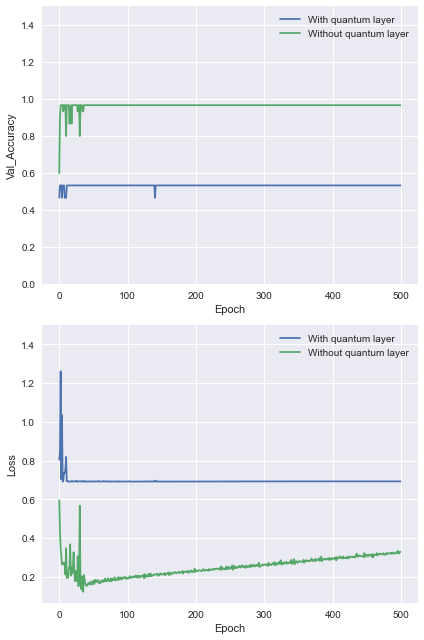

In [99]:
import matplotlib.pyplot as plt

plt.style.use("seaborn")
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 9))

ax1.plot(q_history.history["val_accuracy"], label="With quantum layer")
ax1.plot(c_history.history["val_accuracy"], label="Without quantum layer")
ax1.set_ylabel("Val_Accuracy")
ax1.set_ylim([0, 1.5])
ax1.set_xlabel("Epoch")
ax1.legend()

ax2.plot(q_history.history["val_loss"], label="With quantum layer")
ax2.plot(c_history.history["val_loss"], label="Without quantum layer")
ax2.set_ylabel("Loss")
ax2.set_ylim(top=1.5)
ax2.set_xlabel("Epoch")
ax2.legend()

plt.tight_layout()

plt.show()

In [100]:
score_q = q_model.evaluate(q_test_images, test_labels, verbose=0)
test_lab_pr = q_model.predict(q_test_images)
prd_q_lab   = len(test_lab_pr) * [0]
for i in range(len(test_lab_pr)):
    if test_lab_pr[i][1] > 0.75:
        prd_q_lab[i] = 1
dict(zip(q_model.metrics_names, score_q))
print(test_lab_pr)

[[0.5407913  0.45920873]
 [0.5407849  0.4592151 ]
 [0.5407849  0.4592151 ]
 [0.5408118  0.45918825]
 [0.5408016  0.45919845]
 [0.5408016  0.45919845]
 [0.54080945 0.4591906 ]
 [0.54080945 0.4591906 ]
 [0.5408016  0.45919845]
 [0.5408016  0.45919845]
 [0.5408016  0.45919845]
 [0.5408016  0.45919845]
 [0.5408016  0.45919845]
 [0.5407913  0.45920873]
 [0.5408016  0.45919845]
 [0.5408274  0.45917267]
 [0.5408016  0.45919845]
 [0.5408016  0.45919845]
 [0.5408016  0.45919845]
 [0.5408016  0.45919845]
 [0.5408016  0.45919845]
 [0.5408118  0.45918825]
 [0.5408274  0.45917267]
 [0.5408016  0.45919845]]


In [101]:
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.metrics import precision_recall_fscore_support
print(test_labels)
print(prd_q_lab)
qcm = confusion_matrix(test_labels, prd_q_lab)
tn, fp, fn, tp = qcm.ravel()
print(tn,fp,fn,tp)
q_scr = precision_recall_fscore_support(test_labels, prd_q_lab ) # , average='binary',labels=[0])
print(q_scr)
f1_score(test_labels, prd_q_lab, average=None)


[0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 0 0 0 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
16 0 8 0
(array([0.66666667, 0.        ]), array([1., 0.]), array([0.8, 0. ]), array([16,  8]))


/Users/h4/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([0.8, 0. ])

In [102]:
score_c = c_model.evaluate(test_images, test_labels, verbose=0)
test_lab_pr2= c_model.predict(test_images)
prd_c_lab   = len(test_lab_pr2) * [0]
for i in range(len(test_lab_pr2)):
    if test_lab_pr2[i][1] > 0.75:
        prd_c_lab[i] = 1
dict(zip(c_model.metrics_names, score_c))
print(test_lab_pr2)

[[1.00000000e+00 1.00090791e-12]
 [1.00000000e+00 2.54919268e-13]
 [1.00000000e+00 2.54919268e-13]
 [1.00000000e+00 4.01384705e-25]
 [1.00000000e+00 2.11675331e-34]
 [1.00000000e+00 2.11675331e-34]
 [1.00000000e+00 1.69179563e-24]
 [1.00000000e+00 1.69179563e-24]
 [1.79733579e-08 1.00000000e+00]
 [1.02782309e-07 9.99999881e-01]
 [1.00000000e+00 1.47300765e-11]
 [1.60096665e-08 1.00000000e+00]
 [2.88603292e-08 1.00000000e+00]
 [1.00000000e+00 1.00090791e-12]
 [1.95744946e-07 9.99999762e-01]
 [1.00000000e+00 2.12819112e-14]
 [3.42805765e-06 9.99996543e-01]
 [1.00000000e+00 2.45928163e-20]
 [3.61535314e-07 9.99999642e-01]
 [1.00000000e+00 2.45928163e-20]
 [1.00000000e+00 1.47300765e-11]
 [1.00000000e+00 4.01384705e-25]
 [1.00000000e+00 2.12819112e-14]
 [1.01407304e-01 8.98592710e-01]]


In [103]:
print(test_labels)
print(prd_c_lab)
ccm = confusion_matrix(test_labels, prd_c_lab)
tn, fp, fn, tp = ccm.ravel()
print(tn,fp,fn,tp)
c_scr = precision_recall_fscore_support(test_labels, prd_c_lab ) # , average='binary',labels=[0])
print(c_scr)
f1_score(test_labels, prd_c_lab, average=None)

[0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 0 0 0 1]
[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1]
16 0 0 8
(array([1., 1.]), array([1., 1.]), array([1., 1.]), array([16,  8]))


array([1., 1.])

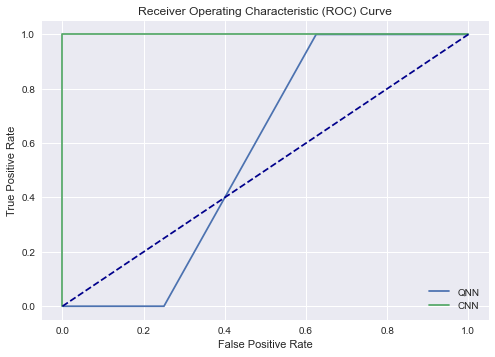

In [104]:
from sklearn.metrics import roc_curve
def plot_roc_curve(fper, tper, lab):
    for j in range(len(fper)):
        plt.plot(fper[j], tper[j], label=lab[j])
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

fper, tper, thresholds = roc_curve(test_labels, test_lab_pr[:,1]) 
fper2,tper2,thresholds = roc_curve(test_labels, test_lab_pr2[:,1]) 
plot_roc_curve([fper,fper2], [tper,tper2],['QNN','CNN'])

# Second example

In [5]:
import tensorflow as tf
n_epochs = 30   # Number of optimization epochs
n_layers = 1    # Number of random layers
n_train  = 50    # Size of the train dataset
n_test   = 30     # Size of the test dataset

SAVE_PATH = "/Users/h4/desktop/" # Data saving folder
PREPROCESS = True           # If False, skip quantum processing and load data from SAVE_PATH
np.random.seed(0)           # Seed for NumPy random number generator
tf.random.set_seed(0)       # Seed for TensorFlow random number generator

In [13]:
import pennylane as qml
from pennylane import numpy as np

# we use 4 wires for a convolution window 2x2

# pixel discposition as in:

#########################
### theta_0 # theta_1 ###
### theta_2 # theta_3 ###
#########################

# theta is the angle of rotation around X axis
# the theta angle is mapped to the pixel value [0,1] in grey scale
# so that |psi>=cos(theta/2)|0>+sin(theta/2)|1>


wires = 4 
dev = qml.device("default.qubit", wires=wires)

E_x_y =[(0,1, 1.0),
    (1,2, 1.0),
    (2,3, 1.0)]

def circuit(theta_0, theta_1, theta_2, theta_3, phi1): 
    qml.RX(theta_0, wires=0) 
    qml.RX(theta_1, wires=1)
    qml.RX(theta_2, wires=2)
    qml.RX(theta_3, wires=3)
    
    qml.CRot(np.pi * phi1, 0, 0, wires=[0,1])
    qml.CRot(np.pi * phi1, 0, 0, wires=[1,2])
    qml.CRot(np.pi * phi1, 0, 0, wires=[2,3])
    qml.CRot(np.pi * phi1, 0, 0, wires=[3,0])
    
def find_unitary(template, *args, **kwargs):
    
    @qml.qnode(dev)
    def find_output_state(input_state):
        qml.QubitStateVector(input_state, wires=range(wires))
        template(*args, **kwargs)
        return qml.state()
    input_states = np.eye(2 ** wires)   # initializes the state to |0> and |1>
    return np.stack([find_output_state(state) for state in input_states]).T

[[[[  0]
   [  1]
   [  1]
   ...
   [  0]
   [  0]
   [  0]]

  [[  0]
   [  1]
   [  1]
   ...
   [  0]
   [  0]
   [  0]]

  [[  1]
   [  1]
   [  1]
   ...
   [163]
   [ 93]
   [  0]]

  ...

  [[ 62]
   [ 63]
   [ 60]
   ...
   [  0]
   [  0]
   [  0]]

  [[ 59]
   [ 58]
   [ 50]
   ...
   [  0]
   [  0]
   [  0]]

  [[ 51]
   [ 31]
   [ 27]
   ...
   [  0]
   [  0]
   [  0]]]]
[[[[  0]
   [  1]
   [  1]
   ...
   [  0]
   [  0]
   [  0]]

  [[  1]
   [  1]
   [  1]
   ...
   [  0]
   [  0]
   [  0]]

  [[  1]
   [  1]
   [  1]
   ...
   [  1]
   [237]
   [  0]]

  ...

  [[ 55]
   [ 56]
   [ 51]
   ...
   [  0]
   [  0]
   [  0]]

  [[ 49]
   [ 49]
   [ 49]
   ...
   [  0]
   [  0]
   [  0]]

  [[ 47]
   [ 32]
   [ 24]
   ...
   [  0]
   [  0]
   [  0]]]]
[[[[  0]
   [  0]
   [  0]
   ...
   [  0]
   [  0]
   [  0]]

  [[  0]
   [  0]
   [  0]
   ...
   [  0]
   [  0]
   [  0]]

  [[  0]
   [  0]
   [  0]
   ...
   [126]
   [237]
   [  0]]

  ...

  [[ 43]
   [109]
   [107]
   ..

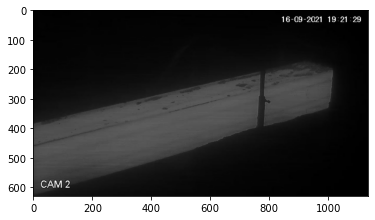

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

###
DATADIR = "/Users/h4/Desktop/IFAC/Descascarillador_split/train/Class1_Bad"
IMG_SIZE=64

path = os.path.join(DATADIR)

training_data = []

def create_training_data():
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
        training_data.append([new_array, 0])  

create_training_data()

train_Class1_Bad = training_data

X = []
y = []

for features,label in train_Class1_Bad:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X_train_Class1_Bad = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_train_Class1_Bad = y

###
DATADIR = "/Users/h4/Desktop/IFAC/Descascarillador_split/train/Class2_Good"
IMG_SIZE=64

path = os.path.join(DATADIR)

training_data = []

def create_training_data():
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
        training_data.append([new_array, 1])  

create_training_data()

train_Class2_Good = training_data

X = []
y = []

for features,label in train_Class2_Good:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X_train_Class2_Good = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_train_Class2_Good = y

###
DATADIR = "/Users/h4/Desktop/IFAC/Descascarillador_split/val/Class1_Bad"
IMG_SIZE=64

path = os.path.join(DATADIR)

training_data = []

def create_training_data():
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
        training_data.append([new_array, 0])  

create_training_data()

val_Class1_Bad = training_data

X = []
y = []

for features,label in val_Class1_Bad:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X_val_Class1_Bad = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_val_Class1_Bad = y


###
DATADIR = "/Users/h4/Desktop/IFAC/Descascarillador_split/val/Class2_Good"
IMG_SIZE=64

path = os.path.join(DATADIR)

training_data = []

def create_training_data():
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
        training_data.append([new_array, 1])  

create_training_data()

Class2_Good = training_data

X = []
y = []

for features,label in Class2_Good:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X_val_Class2_Good = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_val_Class2_Good = y


###
DATADIR = "/Users/h4/Desktop/IFAC/Descascarillador_split/test/Class1_Bad"
IMG_SIZE=64

path = os.path.join(DATADIR)

training_data = []

def create_test_data():
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
        training_data.append([new_array, 0])  

create_test_data()

test_Class1_Bad = training_data

X = []
y = []

for features,label in test_Class1_Bad:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X_test_Class1_Bad = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_test_Class1_Bad = y

###
DATADIR = "/Users/h4/Desktop/IFAC/Descascarillador_split/test/Class2_Good"
IMG_SIZE=64

path = os.path.join(DATADIR)

test_data = []

def create_test_data():
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
        training_data.append([new_array, 1])  

create_test_data()

test_Class2_Good = training_data

X = []
y = []

for features,label in test_Class2_Good:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X_test_Class2_Good = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_test_Class2_Good = y



In [15]:
def unison_shuffled_copies(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]

X_train = np.concatenate((X_train_Class1_Bad, X_train_Class2_Good), axis=0)
y_train = np.concatenate((y_train_Class1_Bad, y_train_Class2_Good), axis=0)

X_val = np.concatenate((X_val_Class1_Bad, X_val_Class2_Good), axis=0)
y_val = np.concatenate((y_val_Class1_Bad, y_val_Class2_Good), axis=0)

X_test = np.concatenate((X_test_Class1_Bad, X_test_Class2_Good), axis=0)
y_test = np.concatenate((y_test_Class1_Bad, y_test_Class2_Good), axis=0)

X_train, y_train = unison_shuffled_copies(X_train, y_train)
X_val, y_val = unison_shuffled_copies(X_val, y_val)
X_test, y_test = unison_shuffled_copies(X_test, y_test)

In [16]:
# Reduce dataset size
train_images = X_train[:n_train]
train_labels = y_train[:n_train]

val_images = X_val[:n_val]
val_labels = y_val[:n_val]

test_images = X_test[:n_test]
test_labels = y_test[:n_test]

# Normalize pixel values within 0 and 1
train_images = train_images / 255
val_images = val_images / 255
test_images = test_images / 255

# Add extra dimension for convolution channels
train_images = np.array(train_images[..., tf.newaxis])
val_images = np.array(val_images[..., tf.newaxis])
test_images = np.array(test_images[..., tf.newaxis])

In [17]:
import tensorflow as tf

def quantum_higher_convolution(image):
    empty_U = np.array([])
    U1 = np.array([])
    for j in range(0, 64, 2):
        for k in range(0, 64, 2):
            # Process a squared 2x2 region of the image with a quantum circuit
            U = find_unitary(circuit, 
                             image[j , k, 0],
                             image[j, k + 1, 0],
                             image[j + 1, k, 0],
                             image[j + 1, k + 1, 0],
                             0)
            U1 = np.append(U1,U)
    return [np.real(U1), np.imag(U1)]

In [18]:
    if PREPROCESS == True:
        q_train_images = []
        print("Quantum pre-processing of train images:")
        for idx, img in enumerate(train_images):
            print("{}/{}        ".format(idx + 1, n_train), end="\r")
            q_train_images.append(quantum_higher_convolution(img))
        q_train_images = np.asarray(q_train_images)

        q_test_images = []
        print("\nQuantum pre-processing of test images:")
        for idx, img in enumerate(test_images):
            print("{}/{}        ".format(idx + 1, n_test), end="\r")
            q_test_images.append(quantum_higher_convolution(img))
        q_test_images = np.asarray(q_test_images)

        q_val_images = []
        print("\nQuantum pre-processing of validation images:")
        for idx, img in enumerate(val_images):
            print("{}/{}        ".format(idx + 1, n_val), end="\r")
            q_val_images.append(quantum_higher_convolution(img))
        q_val_images = np.asarray(q_val_images)

        # Save pre-processed images
        np.save(SAVE_PATH + "q_train_images_1.npy", q_train_images)
        np.save(SAVE_PATH + "q_val_images_1.npy", q_val_images)
        np.save(SAVE_PATH + "q_test_images_1.npy", q_test_images)


    # Load pre-processed images
    q_train_images = np.load(SAVE_PATH + "q_train_images_1.npy")
    q_val_images = np.load(SAVE_PATH + "q_val_images_1.npy")
    q_test_images = np.load(SAVE_PATH + "q_test_images_1.npy")

Quantum pre-processing of train images:
50/50        
Quantum pre-processing of test images:
16/16        
Quantum pre-processing of validation images:


In [19]:
import tensorflow as tf
import tensorflow.keras.backend as K
# from keras import backend as K
from sklearn.metrics import roc_auc_score

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

def MyModel():
    """Initializes and returns a custom Keras model
    which is ready to be trained."""
    model = keras.models.Sequential([
        keras.layers.Flatten(),
        keras.layers.Dense(512, activation="relu"),        
        keras.layers.Dense(32, activation="relu"),        
        keras.layers.Dense(2, activation="softmax")
    ])

    model.compile(
        optimizer='adam',
        loss="sparse_categorical_crossentropy",
        metrics=[["accuracy"],f1_m,precision_m, recall_m],
    )
    return model

In [32]:
import keras

q_model = MyModel()

q_history = q_model.fit(
    q_train_images,
    train_labels,
    validation_data=(q_val_images, val_labels),
    batch_size=2,
    epochs=100,
    verbose=1,
)

Epoch 1/100
25/25 [==============================] - 30s 1s/step - loss: 8.6398 - accuracy: 0.5600 - f1_m: 0.6533 - precision_m: 0.5600 - recall_m: 0.8400 - val_loss: 4.9854 - val_accuracy: 0.4667 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 2/100
25/25 [==============================] - 24s 947ms/step - loss: 7.4700 - accuracy: 0.5000 - f1_m: 0.6533 - precision_m: 0.5600 - recall_m: 0.8400 - val_loss: 12.6890 - val_accuracy: 0.5333 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 3/100
25/25 [==============================] - 23s 936ms/step - loss: 14.6953 - accuracy: 0.5000 - f1_m: 0.6667 - precision_m: 0.5600 - recall_m: 0.8800 - val_loss: 15.7933 - val_accuracy: 0.5333 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 4/100
25/25 [==============================] - 22s 886ms/step - loss: 6.2937 - accuracy: 0.6800 - f1_m: 0.6267 - precision_m: 0.5600 - recall_m: 0.7600 - val_loss: 3.2870 - val_accuracy: 0.6

25/25 [==============================] - 22s 875ms/step - loss: 0.1309 - accuracy: 0.9600 - f1_m: 0.6400 - precision_m: 0.5600 - recall_m: 0.8000 - val_loss: 0.1558 - val_accuracy: 0.9667 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 62/100
25/25 [==============================] - 22s 871ms/step - loss: 0.3058 - accuracy: 0.8600 - f1_m: 0.6667 - precision_m: 0.5600 - recall_m: 0.8800 - val_loss: 0.1816 - val_accuracy: 0.9667 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 63/100
25/25 [==============================] - 21s 854ms/step - loss: 0.2611 - accuracy: 0.8800 - f1_m: 0.6533 - precision_m: 0.5600 - recall_m: 0.8400 - val_loss: 0.1476 - val_accuracy: 0.9667 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 64/100
25/25 [==============================] - 22s 872ms/step - loss: 0.3365 - accuracy: 0.8600 - f1_m: 0.6133 - precision_m: 0.5600 - recall_m: 0.7200 - val_loss: 0.1805 - val_accuracy: 0.9667 - val

In [33]:
c_model = MyModel()

c_history = c_model.fit(
    train_images,
    train_labels,
    validation_data=(val_images, val_labels),
    batch_size=2,
    epochs=100,
    verbose=1,
)

Epoch 1/100
25/25 [==============================] - 1s 18ms/step - loss: 0.6993 - accuracy: 0.6400 - f1_m: 0.6533 - precision_m: 0.5600 - recall_m: 0.8400 - val_loss: 0.5783 - val_accuracy: 0.6333 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 2/100
25/25 [==============================] - 0s 10ms/step - loss: 0.5525 - accuracy: 0.7400 - f1_m: 0.6533 - precision_m: 0.5600 - recall_m: 0.8400 - val_loss: 0.4252 - val_accuracy: 0.9667 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 3/100
25/25 [==============================] - 0s 9ms/step - loss: 0.4815 - accuracy: 0.8400 - f1_m: 0.6667 - precision_m: 0.5600 - recall_m: 0.8800 - val_loss: 0.3369 - val_accuracy: 0.9667 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 4/100
25/25 [==============================] - 0s 9ms/step - loss: 0.3393 - accuracy: 0.8400 - f1_m: 0.6267 - precision_m: 0.5600 - recall_m: 0.7600 - val_loss: 0.3882 - val_accuracy: 0.8000 - val_

Epoch 32/100
25/25 [==============================] - 0s 9ms/step - loss: 0.0923 - accuracy: 0.9600 - f1_m: 0.6533 - precision_m: 0.5600 - recall_m: 0.8400 - val_loss: 0.9337 - val_accuracy: 0.8000 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 33/100
25/25 [==============================] - 0s 9ms/step - loss: 0.3471 - accuracy: 0.9400 - f1_m: 0.6267 - precision_m: 0.5600 - recall_m: 0.7600 - val_loss: 0.1369 - val_accuracy: 0.9667 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 34/100
25/25 [==============================] - 0s 9ms/step - loss: 0.0159 - accuracy: 1.0000 - f1_m: 0.6400 - precision_m: 0.5600 - recall_m: 0.8000 - val_loss: 0.1960 - val_accuracy: 0.9667 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 35/100
25/25 [==============================] - 0s 9ms/step - loss: 0.0404 - accuracy: 1.0000 - f1_m: 0.6533 - precision_m: 0.5600 - recall_m: 0.8400 - val_loss: 0.1682 - val_accuracy: 0.9667 - va

Epoch 63/100
25/25 [==============================] - 0s 9ms/step - loss: 1.8794e-04 - accuracy: 1.0000 - f1_m: 0.6533 - precision_m: 0.5600 - recall_m: 0.8400 - val_loss: 0.1887 - val_accuracy: 0.9667 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 64/100
25/25 [==============================] - 0s 9ms/step - loss: 1.6441e-04 - accuracy: 1.0000 - f1_m: 0.6133 - precision_m: 0.5600 - recall_m: 0.7200 - val_loss: 0.1890 - val_accuracy: 0.9667 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 65/100
25/25 [==============================] - 0s 8ms/step - loss: 1.5038e-04 - accuracy: 1.0000 - f1_m: 0.6667 - precision_m: 0.5600 - recall_m: 0.8800 - val_loss: 0.1894 - val_accuracy: 0.9667 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 66/100
25/25 [==============================] - 0s 8ms/step - loss: 1.2565e-04 - accuracy: 1.0000 - f1_m: 0.6267 - precision_m: 0.5600 - recall_m: 0.7600 - val_loss: 0.1912 - val_accur

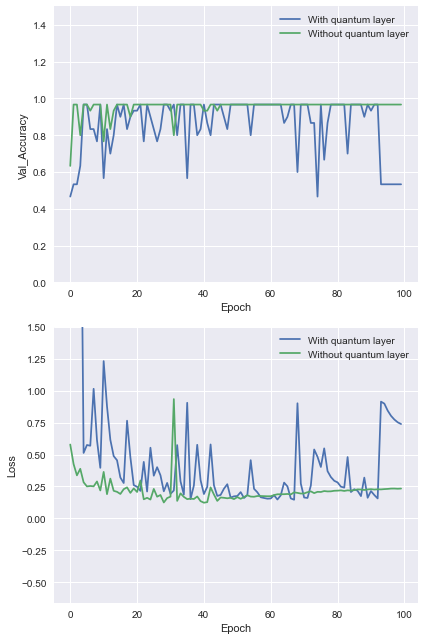

In [34]:
import matplotlib.pyplot as plt

plt.style.use("seaborn")
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 9))

ax1.plot(q_history.history["val_accuracy"], label="With quantum layer")
ax1.plot(c_history.history["val_accuracy"], label="Without quantum layer")
ax1.set_ylabel("Val_Accuracy")
ax1.set_ylim([0, 1.5])
ax1.set_xlabel("Epoch")
ax1.legend()

ax2.plot(q_history.history["val_loss"], label="With quantum layer")
ax2.plot(c_history.history["val_loss"], label="Without quantum layer")
ax2.set_ylabel("Loss")
ax2.set_ylim(top=1.5)
ax2.set_xlabel("Epoch")
ax2.legend()

plt.tight_layout()

plt.show()

In [35]:
score_q = q_model.evaluate(q_test_images, test_labels, verbose=0)
test_lab_pr = q_model.predict(q_test_images)
prd_q_lab   = len(test_lab_pr) * [0]
for i in range(len(test_lab_pr)):
    if test_lab_pr[i][1] > 0.75:
        prd_q_lab[i] = 1
dict(zip(q_model.metrics_names, score_q))
print(test_lab_pr)

[[0.2958175  0.7041825 ]
 [0.2958175  0.7041825 ]
 [0.2958175  0.7041825 ]
 [0.2959719  0.70402807]
 [0.4067397  0.5932603 ]
 [0.4067397  0.5932603 ]
 [0.2958175  0.7041825 ]
 [0.2958175  0.7041825 ]
 [0.2958175  0.7041825 ]
 [0.2958175  0.7041825 ]
 [0.2958175  0.7041825 ]
 [0.2958175  0.7041825 ]
 [0.2958175  0.7041825 ]
 [0.2958175  0.7041825 ]
 [0.2958175  0.7041825 ]
 [0.2958175  0.7041825 ]]


In [25]:
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.metrics import precision_recall_fscore_support
print(test_labels)
print(prd_q_lab)
qcm = confusion_matrix(test_labels, prd_q_lab)
tn, fp, fn, tp = qcm.ravel()
print(tn,fp,fn,tp)
q_scr = precision_recall_fscore_support(test_labels, prd_q_lab ) # , average='binary',labels=[0])
print(q_scr)
f1_score(test_labels, prd_q_lab, average=None)


[0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 0]
[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0]
11 0 0 5
(array([1., 1.]), array([1., 1.]), array([1., 1.]), array([11,  5]))


array([1., 1.])

In [26]:
score_c = c_model.evaluate(test_images, test_labels, verbose=0)
test_lab_pr2= c_model.predict(test_images)
prd_c_lab   = len(test_lab_pr2) * [0]
for i in range(len(test_lab_pr2)):
    if test_lab_pr2[i][1] > 0.75:
        prd_c_lab[i] = 1
dict(zip(c_model.metrics_names, score_c))
print(test_lab_pr2)

[[9.9999785e-01 2.0937387e-06]
 [9.9999833e-01 1.6217322e-06]
 [9.9999833e-01 1.6217322e-06]
 [1.0000000e+00 3.3646270e-09]
 [1.0000000e+00 1.7596905e-11]
 [1.0000000e+00 1.7596905e-11]
 [1.0000000e+00 1.0049252e-08]
 [1.0000000e+00 1.0049252e-08]
 [1.5393987e-05 9.9998462e-01]
 [1.4568480e-04 9.9985433e-01]
 [9.9999344e-01 6.6064235e-06]
 [9.6681933e-06 9.9999034e-01]
 [6.3042920e-05 9.9993694e-01]
 [9.9999785e-01 2.0937387e-06]
 [1.4367685e-04 9.9985635e-01]
 [9.9999952e-01 4.5808679e-07]]


In [27]:
print(test_labels)
print(prd_c_lab)
ccm = confusion_matrix(test_labels, prd_c_lab)
tn, fp, fn, tp = ccm.ravel()
print(tn,fp,fn,tp)
c_scr = precision_recall_fscore_support(test_labels, prd_c_lab ) # , average='binary',labels=[0])
print(c_scr)
f1_score(test_labels, prd_c_lab, average=None)

[0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 0]
[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0]
11 0 0 5
(array([1., 1.]), array([1., 1.]), array([1., 1.]), array([11,  5]))


array([1., 1.])

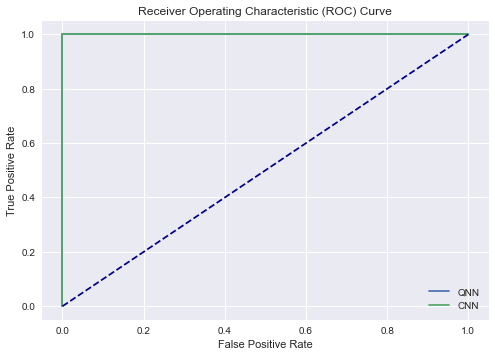

In [28]:
from sklearn.metrics import roc_curve
def plot_roc_curve(fper, tper, lab):
    for j in range(len(fper)):
        plt.plot(fper[j], tper[j], label=lab[j])
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

fper, tper, thresholds = roc_curve(test_labels, test_lab_pr[:,1]) 
fper2,tper2,thresholds = roc_curve(test_labels, test_lab_pr2[:,1]) 
plot_roc_curve([fper,fper2], [tper,tper2],['QNN','CNN'])

# Test circuit 3

In [69]:
n_epochs = 30   # Number of optimization epochs
n_layers = 1    # Number of random layers
n_train  = 50    # Size of the train dataset
n_test   = 30     # Size of the test dataset

SAVE_PATH = "/Users/h4/desktop/" # Data saving folder
PREPROCESS = True           # If False, skip quantum processing and load data from SAVE_PATH
np.random.seed(0)           # Seed for NumPy random number generator
tf.random.set_seed(0)       # Seed for TensorFlow random number generator

In [70]:
import pennylane as qml
from pennylane import numpy as np

# we use 4 wires for a convolution window 2x2

# pixel discposition as in:

#########################
### theta_0 # theta_1 ###
### theta_2 # theta_3 ###
#########################

# theta is the angle of rotation around X axis
# the theta angle is mapped to the pixel value [0,1] in grey scale
# so that |psi>=cos(theta/2)|0>+sin(theta/2)|1>


wires = 4 
dev = qml.device("default.qubit", wires=wires)

E_x_y =[(0,1, 1.0),
    (1,2, 1.0),
    (2,3, 1.0)]

def circuit(theta_0, theta_1, theta_2, theta_3, phi1): 
    qml.RX(theta_0, wires=0) 
    qml.RX(theta_1, wires=1)
    qml.RX(theta_2, wires=1)
    qml.RX(theta_3, wires=1)
    
    qml.CRot(np.pi * phi1, 0, 0, wires=[0,1])
    qml.CRot(np.pi * phi1, 0, 0, wires=[1,2])
    qml.CRot(np.pi * phi1, 0, 0, wires=[2,3])
    qml.CRot(np.pi * phi1, 0, 0, wires=[3,0])
    
    qml.Hadamard(wires=0)
    qml.Hadamard(wires=1)
    qml.Hadamard(wires=2)
    qml.Hadamard(wires=3)
    
def find_unitary(template, *args, **kwargs):
    
    @qml.qnode(dev)
    def find_output_state(input_state):
        qml.QubitStateVector(input_state, wires=range(wires))
        template(*args, **kwargs)
        return qml.state()
    input_states = np.eye(2 ** wires)   # initializes the state to |0> and |1>
    return np.stack([find_output_state(state) for state in input_states]).T

[[[[  0]
   [  1]
   [  1]
   ...
   [  0]
   [  0]
   [  0]]

  [[  0]
   [  1]
   [  1]
   ...
   [  0]
   [  0]
   [  0]]

  [[  1]
   [  1]
   [  1]
   ...
   [163]
   [ 93]
   [  0]]

  ...

  [[ 62]
   [ 63]
   [ 60]
   ...
   [  0]
   [  0]
   [  0]]

  [[ 59]
   [ 58]
   [ 50]
   ...
   [  0]
   [  0]
   [  0]]

  [[ 51]
   [ 31]
   [ 27]
   ...
   [  0]
   [  0]
   [  0]]]]
[[[[  0]
   [  1]
   [  1]
   ...
   [  0]
   [  0]
   [  0]]

  [[  1]
   [  1]
   [  1]
   ...
   [  0]
   [  0]
   [  0]]

  [[  1]
   [  1]
   [  1]
   ...
   [  1]
   [237]
   [  0]]

  ...

  [[ 55]
   [ 56]
   [ 51]
   ...
   [  0]
   [  0]
   [  0]]

  [[ 49]
   [ 49]
   [ 49]
   ...
   [  0]
   [  0]
   [  0]]

  [[ 47]
   [ 32]
   [ 24]
   ...
   [  0]
   [  0]
   [  0]]]]
[[[[  0]
   [  0]
   [  0]
   ...
   [  0]
   [  0]
   [  0]]

  [[  0]
   [  0]
   [  0]
   ...
   [  0]
   [  0]
   [  0]]

  [[  0]
   [  0]
   [  0]
   ...
   [126]
   [237]
   [  0]]

  ...

  [[ 43]
   [109]
   [107]
   ..

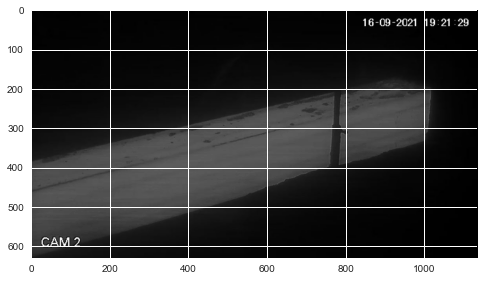

In [71]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

###
DATADIR = "/Users/h4/Desktop/IFAC/Descascarillador_split/train/Class1_Bad"
IMG_SIZE=64

path = os.path.join(DATADIR)

training_data = []

def create_training_data():
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
        training_data.append([new_array, 0])  

create_training_data()

train_Class1_Bad = training_data

X = []
y = []

for features,label in train_Class1_Bad:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X_train_Class1_Bad = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_train_Class1_Bad = y

###
DATADIR = "/Users/h4/Desktop/IFAC/Descascarillador_split/train/Class2_Good"
IMG_SIZE=64

path = os.path.join(DATADIR)

training_data = []

def create_training_data():
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
        training_data.append([new_array, 1])  

create_training_data()

train_Class2_Good = training_data

X = []
y = []

for features,label in train_Class2_Good:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X_train_Class2_Good = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_train_Class2_Good = y

###
DATADIR = "/Users/h4/Desktop/IFAC/Descascarillador_split/val/Class1_Bad"
IMG_SIZE=64

path = os.path.join(DATADIR)

training_data = []

def create_training_data():
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
        training_data.append([new_array, 0])  

create_training_data()

val_Class1_Bad = training_data

X = []
y = []

for features,label in val_Class1_Bad:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X_val_Class1_Bad = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_val_Class1_Bad = y


###
DATADIR = "/Users/h4/Desktop/IFAC/Descascarillador_split/val/Class2_Good"
IMG_SIZE=64

path = os.path.join(DATADIR)

training_data = []

def create_training_data():
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
        training_data.append([new_array, 1])  

create_training_data()

Class2_Good = training_data

X = []
y = []

for features,label in Class2_Good:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X_val_Class2_Good = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_val_Class2_Good = y


###
DATADIR = "/Users/h4/Desktop/IFAC/Descascarillador_split/test/Class1_Bad"
IMG_SIZE=64

path = os.path.join(DATADIR)

training_data = []

def create_test_data():
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
        training_data.append([new_array, 0])  

create_test_data()

test_Class1_Bad = training_data

X = []
y = []

for features,label in test_Class1_Bad:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X_test_Class1_Bad = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_test_Class1_Bad = y

###
DATADIR = "/Users/h4/Desktop/IFAC/Descascarillador_split/test/Class2_Good"
IMG_SIZE=64

path = os.path.join(DATADIR)

test_data = []

def create_test_data():
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
        training_data.append([new_array, 1])  

create_test_data()

test_Class2_Good = training_data

X = []
y = []

for features,label in test_Class2_Good:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X_test_Class2_Good = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_test_Class2_Good = y



In [72]:
def unison_shuffled_copies(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]

X_train = np.concatenate((X_train_Class1_Bad, X_train_Class2_Good), axis=0)
y_train = np.concatenate((y_train_Class1_Bad, y_train_Class2_Good), axis=0)

X_val = np.concatenate((X_val_Class1_Bad, X_val_Class2_Good), axis=0)
y_val = np.concatenate((y_val_Class1_Bad, y_val_Class2_Good), axis=0)

X_test = np.concatenate((X_test_Class1_Bad, X_test_Class2_Good), axis=0)
y_test = np.concatenate((y_test_Class1_Bad, y_test_Class2_Good), axis=0)

X_train, y_train = unison_shuffled_copies(X_train, y_train)
X_val, y_val = unison_shuffled_copies(X_val, y_val)
X_test, y_test = unison_shuffled_copies(X_test, y_test)

In [73]:
# Reduce dataset size
train_images = X_train[:n_train]
train_labels = y_train[:n_train]

val_images = X_val[:n_val]
val_labels = y_val[:n_val]

test_images = X_test[:n_test]
test_labels = y_test[:n_test]

# Normalize pixel values within 0 and 1
train_images = train_images / 255
val_images = val_images / 255
test_images = test_images / 255

# Add extra dimension for convolution channels
train_images = np.array(train_images[..., tf.newaxis])
val_images = np.array(val_images[..., tf.newaxis])
test_images = np.array(test_images[..., tf.newaxis])

In [74]:
import tensorflow as tf

def quantum_higher_convolution(image):
    empty_U = np.array([])
    U1 = np.array([])
    for j in range(0, 64, 2):
        for k in range(0, 64, 2):
            # Process a squared 2x2 region of the image with a quantum circuit
            U = find_unitary(circuit, 
                             image[j , k, 0],
                             image[j, k + 1, 0],
                             image[j + 1, k, 0],
                             image[j + 1, k + 1, 0],
                             0)
            U1 = np.append(U1,U)
    return [np.real(U1), np.imag(U1)]

In [75]:
    if PREPROCESS == True:
        q_train_images = []
        print("Quantum pre-processing of train images:")
        for idx, img in enumerate(train_images):
            print("{}/{}        ".format(idx + 1, n_train), end="\r")
            q_train_images.append(quantum_higher_convolution(img))
        q_train_images = np.asarray(q_train_images)

        q_test_images = []
        print("\nQuantum pre-processing of test images:")
        for idx, img in enumerate(test_images):
            print("{}/{}        ".format(idx + 1, n_test), end="\r")
            q_test_images.append(quantum_higher_convolution(img))
        q_test_images = np.asarray(q_test_images)

        q_val_images = []
        print("\nQuantum pre-processing of validation images:")
        for idx, img in enumerate(val_images):
            print("{}/{}        ".format(idx + 1, n_val), end="\r")
            q_val_images.append(quantum_higher_convolution(img))
        q_val_images = np.asarray(q_val_images)

        # Save pre-processed images
        np.save(SAVE_PATH + "q_train_images_2.npy", q_train_images)
        np.save(SAVE_PATH + "q_val_images_2.npy", q_val_images)
        np.save(SAVE_PATH + "q_test_images_2.npy", q_test_images)


    # Load pre-processed images
    q_train_images = np.load(SAVE_PATH + "q_train_images_2.npy")
    q_val_images = np.load(SAVE_PATH + "q_val_images_2.npy")
    q_test_images = np.load(SAVE_PATH + "q_test_images_2.npy")

Quantum pre-processing of train images:
50/50        
Quantum pre-processing of test images:
24/30        
Quantum pre-processing of validation images:


In [76]:
import tensorflow as tf
import tensorflow.keras.backend as K
# from keras import backend as K
from sklearn.metrics import roc_auc_score

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

def MyModel():
    """Initializes and returns a custom Keras model
    which is ready to be trained."""
    model = keras.models.Sequential([
        keras.layers.Flatten(),
        keras.layers.Dense(512, activation="relu"),        
        keras.layers.Dense(32, activation="relu"),        
        keras.layers.Dense(2, activation="softmax")
    ])

    model.compile(
        optimizer='adam',
        loss="sparse_categorical_crossentropy",
        metrics=[["accuracy"],f1_m,precision_m, recall_m],
    )
    return model

In [77]:
import keras

q_model = MyModel()

q_history = q_model.fit(
    q_train_images,
    train_labels,
    validation_data=(q_val_images, val_labels),
    batch_size=2,
    epochs=500,
    verbose=1,
)

# store / keep best model = True Tensorflow !

Epoch 1/500
25/25 [==============================] - 27s 901ms/step - loss: 22.2023 - accuracy: 0.4600 - f1_m: 0.6533 - precision_m: 0.5600 - recall_m: 0.8400 - val_loss: 4.0452 - val_accuracy: 0.5333 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 2/500
25/25 [==============================] - 22s 887ms/step - loss: 13.1704 - accuracy: 0.5600 - f1_m: 0.6533 - precision_m: 0.5600 - recall_m: 0.8400 - val_loss: 17.0790 - val_accuracy: 0.5333 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 3/500
25/25 [==============================] - 22s 875ms/step - loss: 13.2340 - accuracy: 0.5600 - f1_m: 0.6667 - precision_m: 0.5600 - recall_m: 0.8800 - val_loss: 6.6695 - val_accuracy: 0.4667 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 4/500
25/25 [==============================] - 22s 884ms/step - loss: 6.4594 - accuracy: 0.4400 - f1_m: 0.6267 - precision_m: 0.5600 - recall_m: 0.7600 - val_loss: 2.4269 - val_accuracy:

25/25 [==============================] - 22s 887ms/step - loss: 0.1390 - accuracy: 0.9400 - f1_m: 0.6400 - precision_m: 0.5600 - recall_m: 0.8000 - val_loss: 0.2965 - val_accuracy: 0.9667 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 62/500
25/25 [==============================] - 22s 882ms/step - loss: 0.3531 - accuracy: 0.8600 - f1_m: 0.6667 - precision_m: 0.5600 - recall_m: 0.8800 - val_loss: 0.3433 - val_accuracy: 0.9667 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 63/500
25/25 [==============================] - 22s 883ms/step - loss: 0.2430 - accuracy: 0.9400 - f1_m: 0.6533 - precision_m: 0.5600 - recall_m: 0.8400 - val_loss: 0.3062 - val_accuracy: 0.9667 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 64/500
25/25 [==============================] - 22s 882ms/step - loss: 0.5612 - accuracy: 0.8400 - f1_m: 0.6133 - precision_m: 0.5600 - recall_m: 0.7200 - val_loss: 0.5227 - val_accuracy: 0.7333 - val

25/25 [==============================] - 22s 885ms/step - loss: 0.1852 - accuracy: 0.9600 - f1_m: 0.6267 - precision_m: 0.5600 - recall_m: 0.7600 - val_loss: 0.2704 - val_accuracy: 0.9667 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 122/500
25/25 [==============================] - 21s 836ms/step - loss: 0.1326 - accuracy: 0.9400 - f1_m: 0.6400 - precision_m: 0.5600 - recall_m: 0.8000 - val_loss: 0.3082 - val_accuracy: 0.8000 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 123/500
25/25 [==============================] - 21s 862ms/step - loss: 0.1673 - accuracy: 0.9000 - f1_m: 0.6267 - precision_m: 0.5600 - recall_m: 0.7600 - val_loss: 0.1986 - val_accuracy: 0.9667 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 124/500
25/25 [==============================] - 22s 883ms/step - loss: 0.1140 - accuracy: 0.9800 - f1_m: 0.6533 - precision_m: 0.5600 - recall_m: 0.8400 - val_loss: 0.2138 - val_accuracy: 0.9667 - 

25/25 [==============================] - 22s 885ms/step - loss: 0.2223 - accuracy: 0.8600 - f1_m: 0.6400 - precision_m: 0.5600 - recall_m: 0.8000 - val_loss: 0.2017 - val_accuracy: 0.9667 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 182/500
25/25 [==============================] - 22s 884ms/step - loss: 0.1098 - accuracy: 0.9800 - f1_m: 0.6400 - precision_m: 0.5600 - recall_m: 0.8000 - val_loss: 0.2121 - val_accuracy: 0.9333 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 183/500
25/25 [==============================] - 22s 883ms/step - loss: 0.0636 - accuracy: 0.9800 - f1_m: 0.6533 - precision_m: 0.5600 - recall_m: 0.8400 - val_loss: 0.2161 - val_accuracy: 0.9667 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 184/500
25/25 [==============================] - 22s 880ms/step - loss: 0.2278 - accuracy: 0.8600 - f1_m: 0.6267 - precision_m: 0.5600 - recall_m: 0.7600 - val_loss: 0.2760 - val_accuracy: 0.9667 - 

25/25 [==============================] - 22s 884ms/step - loss: 0.4665 - accuracy: 0.8400 - f1_m: 0.6533 - precision_m: 0.5600 - recall_m: 0.8400 - val_loss: 0.3537 - val_accuracy: 0.8000 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 242/500
25/25 [==============================] - 22s 879ms/step - loss: 0.2827 - accuracy: 0.9000 - f1_m: 0.6400 - precision_m: 0.5600 - recall_m: 0.8000 - val_loss: 0.1586 - val_accuracy: 0.9667 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 243/500
25/25 [==============================] - 22s 882ms/step - loss: 0.2474 - accuracy: 0.9000 - f1_m: 0.6267 - precision_m: 0.5600 - recall_m: 0.7600 - val_loss: 0.1834 - val_accuracy: 0.9333 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 244/500
25/25 [==============================] - 22s 884ms/step - loss: 0.1867 - accuracy: 0.9400 - f1_m: 0.6533 - precision_m: 0.5600 - recall_m: 0.8400 - val_loss: 0.2037 - val_accuracy: 0.9333 - 

25/25 [==============================] - 22s 868ms/step - loss: 0.0858 - accuracy: 0.9800 - f1_m: 0.6400 - precision_m: 0.5600 - recall_m: 0.8000 - val_loss: 0.2264 - val_accuracy: 0.9667 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 302/500
25/25 [==============================] - 22s 886ms/step - loss: 0.1601 - accuracy: 0.9200 - f1_m: 0.6800 - precision_m: 0.5600 - recall_m: 0.9200 - val_loss: 0.3834 - val_accuracy: 0.8333 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 303/500
25/25 [==============================] - 21s 857ms/step - loss: 0.2758 - accuracy: 0.9200 - f1_m: 0.6533 - precision_m: 0.5600 - recall_m: 0.8400 - val_loss: 0.2377 - val_accuracy: 0.9667 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 304/500
25/25 [==============================] - 22s 892ms/step - loss: 0.0458 - accuracy: 0.9800 - f1_m: 0.6533 - precision_m: 0.5600 - recall_m: 0.8400 - val_loss: 0.1920 - val_accuracy: 0.9667 - 

25/25 [==============================] - 23s 917ms/step - loss: 0.2578 - accuracy: 0.9600 - f1_m: 0.6267 - precision_m: 0.5600 - recall_m: 0.7600 - val_loss: 0.3393 - val_accuracy: 0.9333 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 362/500
25/25 [==============================] - 23s 906ms/step - loss: 0.2255 - accuracy: 0.9400 - f1_m: 0.6533 - precision_m: 0.5600 - recall_m: 0.8400 - val_loss: 0.4765 - val_accuracy: 0.8000 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 363/500
25/25 [==============================] - 22s 892ms/step - loss: 0.2593 - accuracy: 0.9400 - f1_m: 0.6133 - precision_m: 0.5600 - recall_m: 0.7200 - val_loss: 0.3128 - val_accuracy: 0.9667 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 364/500
25/25 [==============================] - 24s 951ms/step - loss: 0.2891 - accuracy: 0.9000 - f1_m: 0.6533 - precision_m: 0.5600 - recall_m: 0.8400 - val_loss: 0.6982 - val_accuracy: 0.6333 - 

25/25 [==============================] - 22s 879ms/step - loss: 0.6868 - accuracy: 0.5600 - f1_m: 0.6267 - precision_m: 0.5600 - recall_m: 0.7600 - val_loss: 0.6887 - val_accuracy: 0.5667 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 422/500
25/25 [==============================] - 22s 877ms/step - loss: 0.6866 - accuracy: 0.5600 - f1_m: 0.6533 - precision_m: 0.5600 - recall_m: 0.8400 - val_loss: 0.6888 - val_accuracy: 0.5667 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 423/500
25/25 [==============================] - 22s 878ms/step - loss: 0.6863 - accuracy: 0.5600 - f1_m: 0.6400 - precision_m: 0.5600 - recall_m: 0.8000 - val_loss: 0.6888 - val_accuracy: 0.5667 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 424/500
25/25 [==============================] - 22s 877ms/step - loss: 0.6864 - accuracy: 0.5600 - f1_m: 0.6267 - precision_m: 0.5600 - recall_m: 0.7600 - val_loss: 0.6888 - val_accuracy: 0.5667 - 

25/25 [==============================] - 22s 881ms/step - loss: 0.6862 - accuracy: 0.5600 - f1_m: 0.6267 - precision_m: 0.5600 - recall_m: 0.7600 - val_loss: 0.6895 - val_accuracy: 0.5667 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 482/500
25/25 [==============================] - 22s 880ms/step - loss: 0.6861 - accuracy: 0.5600 - f1_m: 0.6267 - precision_m: 0.5600 - recall_m: 0.7600 - val_loss: 0.6896 - val_accuracy: 0.5667 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 483/500
25/25 [==============================] - 22s 885ms/step - loss: 0.6862 - accuracy: 0.5600 - f1_m: 0.6400 - precision_m: 0.5600 - recall_m: 0.8000 - val_loss: 0.6894 - val_accuracy: 0.5667 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 484/500
25/25 [==============================] - 22s 882ms/step - loss: 0.6860 - accuracy: 0.5600 - f1_m: 0.6533 - precision_m: 0.5600 - recall_m: 0.8400 - val_loss: 0.6895 - val_accuracy: 0.5667 - 

In [78]:
c_model = MyModel()

c_history = c_model.fit(
    train_images,
    train_labels,
    validation_data=(val_images, val_labels),
    batch_size=2,
    epochs=500,
    verbose=1,
)

Epoch 1/500
25/25 [==============================] - 1s 19ms/step - loss: 0.7113 - accuracy: 0.5800 - f1_m: 0.6533 - precision_m: 0.5600 - recall_m: 0.8400 - val_loss: 0.5950 - val_accuracy: 0.6000 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 2/500
25/25 [==============================] - 0s 10ms/step - loss: 0.5609 - accuracy: 0.7400 - f1_m: 0.6533 - precision_m: 0.5600 - recall_m: 0.8400 - val_loss: 0.4389 - val_accuracy: 0.9000 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 3/500
25/25 [==============================] - 0s 9ms/step - loss: 0.4926 - accuracy: 0.8000 - f1_m: 0.6667 - precision_m: 0.5600 - recall_m: 0.8800 - val_loss: 0.3443 - val_accuracy: 0.9667 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 4/500
25/25 [==============================] - 0s 9ms/step - loss: 0.3441 - accuracy: 0.8400 - f1_m: 0.6267 - precision_m: 0.5600 - recall_m: 0.7600 - val_loss: 0.3033 - val_accuracy: 0.9667 - val_

Epoch 32/500
25/25 [==============================] - 0s 9ms/step - loss: 0.4256 - accuracy: 0.9000 - f1_m: 0.6533 - precision_m: 0.5600 - recall_m: 0.8400 - val_loss: 0.1619 - val_accuracy: 0.9667 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 33/500
25/25 [==============================] - 0s 9ms/step - loss: 0.1044 - accuracy: 0.9600 - f1_m: 0.6267 - precision_m: 0.5600 - recall_m: 0.7600 - val_loss: 0.1367 - val_accuracy: 0.9667 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 34/500
25/25 [==============================] - 0s 10ms/step - loss: 0.0399 - accuracy: 0.9800 - f1_m: 0.6400 - precision_m: 0.5600 - recall_m: 0.8000 - val_loss: 0.2029 - val_accuracy: 0.9667 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 35/500
25/25 [==============================] - 0s 10ms/step - loss: 0.0759 - accuracy: 0.9600 - f1_m: 0.6533 - precision_m: 0.5600 - recall_m: 0.8400 - val_loss: 0.1273 - val_accuracy: 0.9333 - 

Epoch 63/500
25/25 [==============================] - 0s 10ms/step - loss: 5.8377e-04 - accuracy: 1.0000 - f1_m: 0.6533 - precision_m: 0.5600 - recall_m: 0.8400 - val_loss: 0.1806 - val_accuracy: 0.9667 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 64/500
25/25 [==============================] - 0s 10ms/step - loss: 5.6523e-04 - accuracy: 1.0000 - f1_m: 0.6133 - precision_m: 0.5600 - recall_m: 0.7200 - val_loss: 0.1733 - val_accuracy: 0.9667 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 65/500
25/25 [==============================] - 0s 9ms/step - loss: 5.7083e-04 - accuracy: 1.0000 - f1_m: 0.6667 - precision_m: 0.5600 - recall_m: 0.8800 - val_loss: 0.1823 - val_accuracy: 0.9667 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 66/500
25/25 [==============================] - 0s 10ms/step - loss: 4.8833e-04 - accuracy: 1.0000 - f1_m: 0.6267 - precision_m: 0.5600 - recall_m: 0.7600 - val_loss: 0.1735 - val_ac

25/25 [==============================] - 0s 9ms/step - loss: 9.3857e-05 - accuracy: 1.0000 - f1_m: 0.6267 - precision_m: 0.5600 - recall_m: 0.7600 - val_loss: 0.2032 - val_accuracy: 0.9667 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 124/500
25/25 [==============================] - 0s 9ms/step - loss: 9.5221e-05 - accuracy: 1.0000 - f1_m: 0.6533 - precision_m: 0.5600 - recall_m: 0.8400 - val_loss: 0.2096 - val_accuracy: 0.9667 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 125/500
25/25 [==============================] - 0s 9ms/step - loss: 9.6591e-05 - accuracy: 1.0000 - f1_m: 0.6667 - precision_m: 0.5600 - recall_m: 0.8800 - val_loss: 0.1921 - val_accuracy: 0.9667 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 126/500
25/25 [==============================] - 0s 9ms/step - loss: 1.0784e-04 - accuracy: 1.0000 - f1_m: 0.6667 - precision_m: 0.5600 - recall_m: 0.8800 - val_loss: 0.2135 - val_accuracy: 0.966

25/25 [==============================] - 0s 11ms/step - loss: 2.6160e-05 - accuracy: 1.0000 - f1_m: 0.6533 - precision_m: 0.5600 - recall_m: 0.8400 - val_loss: 0.2264 - val_accuracy: 0.9667 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 184/500
25/25 [==============================] - 0s 10ms/step - loss: 2.7583e-05 - accuracy: 1.0000 - f1_m: 0.6267 - precision_m: 0.5600 - recall_m: 0.7600 - val_loss: 0.2244 - val_accuracy: 0.9667 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 185/500
25/25 [==============================] - 0s 10ms/step - loss: 2.5921e-05 - accuracy: 1.0000 - f1_m: 0.6400 - precision_m: 0.5600 - recall_m: 0.8000 - val_loss: 0.2264 - val_accuracy: 0.9667 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 186/500
25/25 [==============================] - 0s 10ms/step - loss: 2.5366e-05 - accuracy: 1.0000 - f1_m: 0.6267 - precision_m: 0.5600 - recall_m: 0.7600 - val_loss: 0.2259 - val_accuracy: 0

25/25 [==============================] - 0s 10ms/step - loss: 9.9918e-06 - accuracy: 1.0000 - f1_m: 0.6267 - precision_m: 0.5600 - recall_m: 0.7600 - val_loss: 0.2418 - val_accuracy: 0.9667 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 244/500
25/25 [==============================] - 0s 9ms/step - loss: 9.6199e-06 - accuracy: 1.0000 - f1_m: 0.6533 - precision_m: 0.5600 - recall_m: 0.8400 - val_loss: 0.2369 - val_accuracy: 0.9667 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 245/500
25/25 [==============================] - 0s 10ms/step - loss: 9.7605e-06 - accuracy: 1.0000 - f1_m: 0.6533 - precision_m: 0.5600 - recall_m: 0.8400 - val_loss: 0.2522 - val_accuracy: 0.9667 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 246/500
25/25 [==============================] - 0s 11ms/step - loss: 9.2313e-06 - accuracy: 1.0000 - f1_m: 0.6400 - precision_m: 0.5600 - recall_m: 0.8000 - val_loss: 0.2399 - val_accuracy: 0.

25/25 [==============================] - 0s 10ms/step - loss: 3.7741e-06 - accuracy: 1.0000 - f1_m: 0.6533 - precision_m: 0.5600 - recall_m: 0.8400 - val_loss: 0.2616 - val_accuracy: 0.9667 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 304/500
25/25 [==============================] - 0s 10ms/step - loss: 3.7646e-06 - accuracy: 1.0000 - f1_m: 0.6533 - precision_m: 0.5600 - recall_m: 0.8400 - val_loss: 0.2630 - val_accuracy: 0.9667 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 305/500
25/25 [==============================] - 0s 9ms/step - loss: 3.6883e-06 - accuracy: 1.0000 - f1_m: 0.6400 - precision_m: 0.5600 - recall_m: 0.8000 - val_loss: 0.2574 - val_accuracy: 0.9667 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 306/500
25/25 [==============================] - 0s 10ms/step - loss: 3.6382e-06 - accuracy: 1.0000 - f1_m: 0.6133 - precision_m: 0.5600 - recall_m: 0.7200 - val_loss: 0.2562 - val_accuracy: 0.

25/25 [==============================] - 0s 9ms/step - loss: 1.5163e-06 - accuracy: 1.0000 - f1_m: 0.6133 - precision_m: 0.5600 - recall_m: 0.7200 - val_loss: 0.2812 - val_accuracy: 0.9667 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 364/500
25/25 [==============================] - 0s 9ms/step - loss: 1.5569e-06 - accuracy: 1.0000 - f1_m: 0.6533 - precision_m: 0.5600 - recall_m: 0.8400 - val_loss: 0.2826 - val_accuracy: 0.9667 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 365/500
25/25 [==============================] - 0s 10ms/step - loss: 1.4520e-06 - accuracy: 1.0000 - f1_m: 0.6533 - precision_m: 0.5600 - recall_m: 0.8400 - val_loss: 0.2798 - val_accuracy: 0.9667 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 366/500
25/25 [==============================] - 0s 9ms/step - loss: 1.4687e-06 - accuracy: 1.0000 - f1_m: 0.6267 - precision_m: 0.5600 - recall_m: 0.7600 - val_loss: 0.2819 - val_accuracy: 0.96

25/25 [==============================] - 0s 9ms/step - loss: 6.5803e-07 - accuracy: 1.0000 - f1_m: 0.6400 - precision_m: 0.5600 - recall_m: 0.8000 - val_loss: 0.3004 - val_accuracy: 0.9667 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 424/500
25/25 [==============================] - 0s 10ms/step - loss: 6.6995e-07 - accuracy: 1.0000 - f1_m: 0.6267 - precision_m: 0.5600 - recall_m: 0.7600 - val_loss: 0.2942 - val_accuracy: 0.9667 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 425/500
25/25 [==============================] - 0s 9ms/step - loss: 6.2227e-07 - accuracy: 1.0000 - f1_m: 0.6667 - precision_m: 0.5600 - recall_m: 0.8800 - val_loss: 0.3030 - val_accuracy: 0.9667 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 426/500
25/25 [==============================] - 0s 9ms/step - loss: 6.2466e-07 - accuracy: 1.0000 - f1_m: 0.6533 - precision_m: 0.5600 - recall_m: 0.8400 - val_loss: 0.3044 - val_accuracy: 0.96

25/25 [==============================] - 0s 9ms/step - loss: 2.7180e-07 - accuracy: 1.0000 - f1_m: 0.6400 - precision_m: 0.5600 - recall_m: 0.8000 - val_loss: 0.3190 - val_accuracy: 0.9667 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 484/500
25/25 [==============================] - 0s 10ms/step - loss: 2.5988e-07 - accuracy: 1.0000 - f1_m: 0.6533 - precision_m: 0.5600 - recall_m: 0.8400 - val_loss: 0.3197 - val_accuracy: 0.9667 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 485/500
25/25 [==============================] - 0s 9ms/step - loss: 2.6703e-07 - accuracy: 1.0000 - f1_m: 0.6400 - precision_m: 0.5600 - recall_m: 0.8000 - val_loss: 0.3231 - val_accuracy: 0.9667 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 486/500
25/25 [==============================] - 0s 9ms/step - loss: 2.5511e-07 - accuracy: 1.0000 - f1_m: 0.6533 - precision_m: 0.5600 - recall_m: 0.8400 - val_loss: 0.3228 - val_accuracy: 0.96

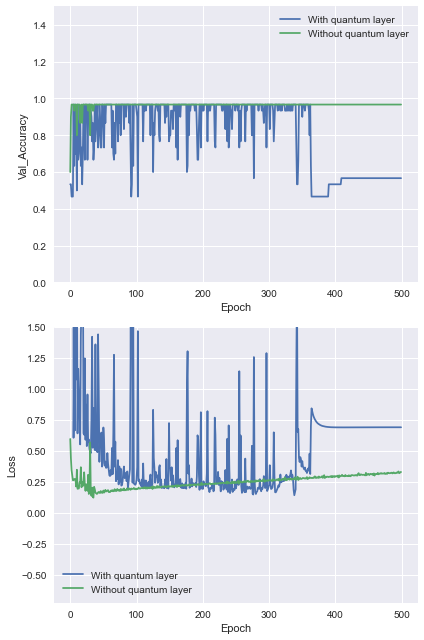

In [79]:
import matplotlib.pyplot as plt

plt.style.use("seaborn")
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 9))

ax1.plot(q_history.history["val_accuracy"], label="With quantum layer")
ax1.plot(c_history.history["val_accuracy"], label="Without quantum layer")
ax1.set_ylabel("Val_Accuracy")
ax1.set_ylim([0, 1.5])
ax1.set_xlabel("Epoch")
ax1.legend()

ax2.plot(q_history.history["val_loss"], label="With quantum layer")
ax2.plot(c_history.history["val_loss"], label="Without quantum layer")
ax2.set_ylabel("Loss")
ax2.set_ylim(top=1.5)
ax2.set_xlabel("Epoch")
ax2.legend()

plt.tight_layout()

plt.show()

# Increase and then apply quanvolution

In [7]:
# in this example we take the images processed by the first example and
# apply a quanvolution to decrease its dimension.
# then compare the results.

In [2]:
import tensorflow as tf
import numpy as np
import pennylane as qml
from pennylane import numpy as np
from pennylane.templates import RandomLayers
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

n_epochs = 30   # Number of optimization epochs
n_layers = 1    # Number of random layers
n_train  = 50    # Size of the train dataset
n_test   = 30     # Size of the test dataset

SAVE_PATH = "/Users/h4/desktop/quantum higher level hilbert space/" # Data saving folder
PREPROCESS = True           # If False, skip quantum processing and load data from SAVE_PATH
np.random.seed(0)           # Seed for NumPy random number generator
tf.random.set_seed(0)       # Seed for TensorFlow random number generator

In [3]:
q_pre_train_images = np.load(SAVE_PATH + "q_train_images_1.npy")
q_pre_val_images = np.load(SAVE_PATH + "q_val_images_1.npy")
q_pre_test_images = np.load(SAVE_PATH + "q_test_images_1.npy")

In [4]:
dev = qml.device("default.qubit", wires=4)
# Random circuit parameters
rand_params = np.random.uniform(high=2 * np.pi, size=(n_layers, 4))

E =[(0,1,1.0),
    (1,2,1.0),
    (2,3,1.0)] 

@qml.qnode(dev)
def circuit(phi):
    # Encoding of 4 classical input values
    for edge in E:
        j = edge[0]
        k = edge[1]
        qml.Hadamard(wires=j)
        qml.Hadamard(wires=k)
        qml.IsingXX(np.pi * phi[j], wires=[j,k])
        qml.IsingZZ(np.pi * phi[j], wires=[j,k])

    # Measurement producing 4 classical output values
    return [qml.expval(qml.PauliZ(j)) for j in range(4)]

In [5]:
def quanv(image):
    """Convolves the input image with many applications of the same quantum circuit."""
    out = np.zeros((int(32*32*16*16/4), int(32*32*16*16/4), 4))
    image = cv2.resize(image, (int(32*32*16*16), int(32*32*16*16)))
    
    # Loop over the coordinates of the top-left pixel of 2X2 squares
    for j in range(0, int(32*32*16*16), 4):
        for k in range(0, int(32*32*16*16), 4):
            # Process a squared 2x2 region of the image with a quantum circuit
            q_results = circuit(
                [
                    image[j , k, 0],
                    image[j , k + 1, 0],
                    image[j + 1, k, 0],
                    image[j + 1, k + 1, 0]]
            )
            # Assign expectation values to different channels of the output pixel (j/2, k/2)
            for c in range(4):
                out[j // 2, k // 2, c] = q_results[c]
    return out

In [ ]:
if PREPROCESS == True:
    q_train_images = []
    print("Quantum pre-processing of train images:")
    for idx, img in enumerate(q_pre_train_images):
        print("{}/{}        ".format(idx + 1, n_train), end="\r")
        q_train_images.append(quanv(img))
    q_train_images = np.asarray(q_train_images)

    q_test_images = []
    print("\nQuantum pre-processing of test images:")
    for idx, img in enumerate(q_pre_test_images):
        print("{}/{}        ".format(idx + 1, n_test), end="\r")
        q_test_images.append(quanv(img))
    q_test_images = np.asarray(q_test_images)
    
    q_val_images = []
    print("\nQuantum pre-processing of validation images:")
    for idx, img in enumerate(q_pre_val_images):
        print("{}/{}        ".format(idx + 1, n_val), end="\r")
        q_val_images.append(quanv(img))
    q_val_images = np.asarray(q_val_images)

    # Save pre-processed images
    np.save(SAVE_PATH + "q_train_images_1_0.npy", q_train_images)
    np.save(SAVE_PATH + "q_val_images_1_0.npy", q_val_images)
    np.save(SAVE_PATH + "q_test_images_1_0.npy", q_test_images)


# Load pre-processed images
q_train_images = np.load(SAVE_PATH + "q_train_images_1_0.npy")
q_val_images   = np.load(SAVE_PATH + "q_val_images_1_0.npy")
q_test_images  = np.load(SAVE_PATH + "q_test_images_1_0.npy")

Quantum pre-processing of train images:


# After increasing the space, we calculate the rotation between all convoluted 16x16 pieces of the mosaic and the Identity 
A*R=I --> rotation=tr(A^-1)

In [1]:
import splitfolders  # or import split_folders
splitfolders.ratio('/Users/h4/Desktop/IFAC/Descascarillador', 
                   output='/Users/h4/Desktop/IFAC/Descascarillador_split', 
                   seed=1337, ratio=(.8, 0.1,0.1)) # default values

Copying files: 151 files [00:00, 599.60 files/s]


In [52]:
import pennylane as qml
from pennylane import numpy as np

# we use 4 wires for a convolution window 2x2

# pixel discposition as in:

#########################
### theta_0 # theta_1 ###
### theta_2 # theta_3 ###
#########################

wires = 4 
dev = qml.device("default.qubit", wires=wires)

E_x_y =[(0,1, 1.0),
        (1,2, 1.0),
        (2,3, 1.0),
        (3,0,1.0)]

def circuit(theta_0, theta_1, theta_2, theta_3, phi1): 
    
    qml.Hadamard(wires=[0])
    qml.Hadamard(wires=[1])
    qml.Hadamard(wires=[2])
    qml.Hadamard(wires=[3])
    
    qml.CRot(np.pi * theta_0, 0, 0, wires=[0,1])
    qml.CRot(np.pi * theta_1, 0, 0, wires=[1,2])
    qml.CRot(np.pi * theta_2, 0, 0, wires=[2,3])
    qml.CRot(np.pi * theta_3, 0, 0, wires=[3,0])
    
    qml.IsingXX(np.pi * phi1, wires=[0,1])
    qml.IsingZZ(np.pi * phi1, wires=[1,2])
    qml.IsingZZ(np.pi * phi1, wires=[2,3])
    qml.IsingXX(np.pi * phi1, wires=[3,0])
    
def find_unitary(template, *args, **kwargs):
    
    @qml.qnode(dev)
    def find_output_state(input_state):
        qml.QubitStateVector(input_state, wires=range(wires))
        template(*args, **kwargs)
        return qml.state()
    input_states = np.eye(2 ** wires)   # initializes the state to |0> and |1>
    return np.stack([find_output_state(state) for state in input_states]).T

In [53]:
import tensorflow as tf
n_epochs = 30   # Number of optimization epochs
n_layers = 1    # Number of random layers
n_train  = 50   # Size of the train dataset
n_test   = 30   # Size of the test dataset
n_val   = 30    # Size of the validation dataset

SAVE_PATH = "/Users/h4/desktop/" # Data saving folder
PREPROCESS = True           # If False, skip quantum processing and load data from SAVE_PATH
np.random.seed(0)           # Seed for NumPy random number generator
tf.random.set_seed(0)       # Seed for TensorFlow random number generator

[[[[  0]
   [  1]
   [  1]
   ...
   [  0]
   [  0]
   [  0]]

  [[  0]
   [  1]
   [  1]
   ...
   [  0]
   [  0]
   [  0]]

  [[  1]
   [  1]
   [  1]
   ...
   [163]
   [ 93]
   [  0]]

  ...

  [[ 62]
   [ 63]
   [ 60]
   ...
   [  0]
   [  0]
   [  0]]

  [[ 59]
   [ 58]
   [ 50]
   ...
   [  0]
   [  0]
   [  0]]

  [[ 51]
   [ 31]
   [ 27]
   ...
   [  0]
   [  0]
   [  0]]]]
[[[[  0]
   [  1]
   [  1]
   ...
   [  0]
   [  0]
   [  0]]

  [[  1]
   [  1]
   [  1]
   ...
   [  0]
   [  0]
   [  0]]

  [[  1]
   [  1]
   [  1]
   ...
   [  1]
   [237]
   [  0]]

  ...

  [[ 55]
   [ 56]
   [ 51]
   ...
   [  0]
   [  0]
   [  0]]

  [[ 49]
   [ 49]
   [ 49]
   ...
   [  0]
   [  0]
   [  0]]

  [[ 47]
   [ 32]
   [ 24]
   ...
   [  0]
   [  0]
   [  0]]]]
[[[[  0]
   [  0]
   [  0]
   ...
   [  0]
   [  0]
   [  0]]

  [[  0]
   [  0]
   [  0]
   ...
   [  0]
   [  0]
   [  0]]

  [[  0]
   [  0]
   [  0]
   ...
   [126]
   [237]
   [  0]]

  ...

  [[ 43]
   [109]
   [107]
   ..

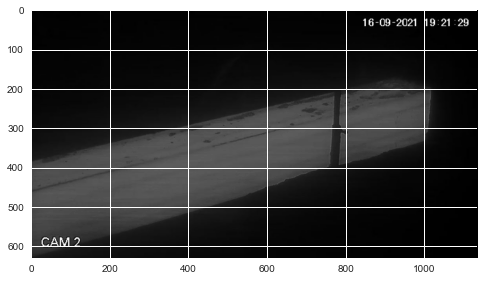

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

###
DATADIR = "/Users/h4/Desktop/IFAC/Descascarillador_split/train/Class1_Bad"
IMG_SIZE=64

path = os.path.join(DATADIR)

training_data = []

def create_training_data():
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
        training_data.append([new_array, 0])  

create_training_data()

train_Class1_Bad = training_data

X = []
y = []

for features,label in train_Class1_Bad:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X_train_Class1_Bad = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_train_Class1_Bad = y

###
DATADIR = "/Users/h4/Desktop/IFAC/Descascarillador_split/train/Class2_Good"
IMG_SIZE=64

path = os.path.join(DATADIR)

training_data = []

def create_training_data():
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
        training_data.append([new_array, 1])  

create_training_data()

train_Class2_Good = training_data

X = []
y = []

for features,label in train_Class2_Good:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X_train_Class2_Good = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_train_Class2_Good = y

###
DATADIR = "/Users/h4/Desktop/IFAC/Descascarillador_split/val/Class1_Bad"
IMG_SIZE=64

path = os.path.join(DATADIR)

training_data = []

def create_training_data():
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
        training_data.append([new_array, 0])  

create_training_data()

val_Class1_Bad = training_data

X = []
y = []

for features,label in val_Class1_Bad:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X_val_Class1_Bad = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_val_Class1_Bad = y


###
DATADIR = "/Users/h4/Desktop/IFAC/Descascarillador_split/val/Class2_Good"
IMG_SIZE=64

path = os.path.join(DATADIR)

training_data = []

def create_training_data():
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
        training_data.append([new_array, 1])  

create_training_data()

Class2_Good = training_data

X = []
y = []

for features,label in Class2_Good:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X_val_Class2_Good = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_val_Class2_Good = y


###
DATADIR = "/Users/h4/Desktop/IFAC/Descascarillador_split/test/Class1_Bad"
IMG_SIZE=64

path = os.path.join(DATADIR)

training_data = []

def create_test_data():
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
        training_data.append([new_array, 0])  

create_test_data()

test_Class1_Bad = training_data

X = []
y = []

for features,label in test_Class1_Bad:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X_test_Class1_Bad = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_test_Class1_Bad = y

###
DATADIR = "/Users/h4/Desktop/IFAC/Descascarillador_split/test/Class2_Good"
IMG_SIZE=64

path = os.path.join(DATADIR)

test_data = []

def create_test_data():
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
        training_data.append([new_array, 1])  

create_test_data()

test_Class2_Good = training_data

X = []
y = []

for features,label in test_Class2_Good:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X_test_Class2_Good = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_test_Class2_Good = y

In [55]:
def unison_shuffled_copies(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]

X_train = np.concatenate((X_train_Class1_Bad, X_train_Class2_Good), axis=0)
y_train = np.concatenate((y_train_Class1_Bad, y_train_Class2_Good), axis=0)

X_val = np.concatenate((X_val_Class1_Bad, X_val_Class2_Good), axis=0)
y_val = np.concatenate((y_val_Class1_Bad, y_val_Class2_Good), axis=0)

X_test = np.concatenate((X_test_Class1_Bad, X_test_Class2_Good), axis=0)
y_test = np.concatenate((y_test_Class1_Bad, y_test_Class2_Good), axis=0)

X_train, y_train = unison_shuffled_copies(X_train, y_train)
X_val, y_val = unison_shuffled_copies(X_val, y_val)
X_test, y_test = unison_shuffled_copies(X_test, y_test)

In [63]:
# Reduce dataset size
train_images = X_train[:n_train]
train_labels = y_train[:n_train]

val_images = X_val[:n_val]
val_labels = y_val[:n_val]

test_images = X_test[:n_test]
test_labels = y_test[:n_test]

# Normalize pixel values within 0 and 1
train_images = train_images / 255
val_images = val_images / 255
test_images = test_images / 255

# Add extra dimension for convolution channels
train_images = np.array(train_images[..., tf.newaxis])
val_images = np.array(val_images[..., tf.newaxis])
test_images = np.array(test_images[..., tf.newaxis])

In [187]:
import tensorflow as tf
from numpy.linalg import inv, norm, eig

id = np.identity(16)

from sklearn.metrics.pairwise import euclidean_distances

def quantum_higher_convolution(image):
    U1 = np.array([])
    for j in range(0, 64, 2):
        for k in range(0, 64, 2):
            # Process a squared 2x2 region of the image with a quantum circuit
            U = find_unitary(circuit, 
                             image[j , k, 0],
                             image[j, k + 1, 0],
                             image[j + 1, k, 0],
                             image[j + 1, k + 1, 0],
                             0.5)
            U1 = np.append(U1,U)
            U1 = np.around(U1, 2)
    return U1

In [193]:
test = quantum_higher_convolution(X_train[:,1])

In [194]:
np.set_printoptions(threshold=100)
test

array([ 0.  -0.j  , -0.25-0.25j,  0.  -0.j  , ...,  0.25+0.25j,
        0.  +0.j  , -0.25-0.25j])

In [190]:
test1 = quantum_higher_convolution(X_train[:,12])

In [191]:
test1

array([-0.25-0.25j,  0.  -0.j  , -0.25-0.25j, ...,  0.25+0.25j,
        0.  +0.j  , -0.25-0.25j])

In [195]:
print(test-test1)

[ 0.25+0.25j -0.25-0.25j  0.25+0.25j ...  0.  +0.j    0.  +0.j
  0.  +0.j  ]


In [196]:
    if PREPROCESS == True:
        q_train_images = []
        print("Quantum pre-processing of train images:")
        for idx, img in enumerate(train_images):
            print("{}/{}        ".format(idx + 1, n_train), end="\r")
            q_train_images.append(quantum_higher_convolution(img))
        q_train_images = np.asarray(q_train_images)

        q_test_images = []
        print("\nQuantum pre-processing of test images:")
        for idx, img in enumerate(test_images):
            print("{}/{}        ".format(idx + 1, n_test), end="\r")
            q_test_images.append(quantum_higher_convolution(img))
        q_test_images = np.asarray(q_test_images)

        q_val_images = []
        print("\nQuantum pre-processing of validation images:")
        for idx, img in enumerate(val_images):
            print("{}/{}        ".format(idx + 1, n_val), end="\r")
            q_val_images.append(quantum_higher_convolution(img))
        q_val_images = np.asarray(q_val_images)

        # Save pre-processed images
        np.save(SAVE_PATH + "q_train_images.npy", q_train_images)
        np.save(SAVE_PATH + "q_val_images.npy", q_val_images)
        np.save(SAVE_PATH + "q_test_images.npy", q_test_images)


    # Load pre-processed images
    q_train_images = np.load(SAVE_PATH + "q_train_images.npy")
    q_val_images = np.load(SAVE_PATH + "q_val_images.npy")
    q_test_images = np.load(SAVE_PATH + "q_test_images.npy")

Quantum pre-processing of train images:
50/50        
Quantum pre-processing of test images:
24/30        
Quantum pre-processing of validation images:


In [197]:
import tensorflow as tf
import tensorflow.keras.backend as K
# from keras import backend as K
from sklearn.metrics import roc_auc_score
import keras

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

def MyModel():
    """Initializes and returns a custom Keras model
    which is ready to be trained."""
    model = keras.models.Sequential([
        keras.layers.Flatten(),
        keras.layers.Dense(512, activation="relu"),        
        keras.layers.Dense(32, activation="relu"),        
        keras.layers.Dense(2, activation="softmax")
    ])

    model.compile(
        optimizer='adam',
        loss="sparse_categorical_crossentropy",
        metrics=[["accuracy"],f1_m,precision_m, recall_m],
    )
    return model

In [198]:
q_model = MyModel()

q_history = q_model.fit(
    q_train_images,
    train_labels,
    validation_data=(q_val_images, val_labels),
    batch_size=2,
    epochs=500,
    verbose=1,
)

Epoch 1/500
25/25 [==============================] - 14s 472ms/step - loss: 7.7926 - accuracy: 0.4600 - f1_m: 0.6533 - precision_m: 0.5600 - recall_m: 0.8400 - val_loss: 1.3102 - val_accuracy: 0.6000 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 2/500
25/25 [==============================] - 11s 456ms/step - loss: 2.9724 - accuracy: 0.6600 - f1_m: 0.6533 - precision_m: 0.5600 - recall_m: 0.8400 - val_loss: 0.4573 - val_accuracy: 0.9333 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 3/500
25/25 [==============================] - 11s 455ms/step - loss: 1.4342 - accuracy: 0.8000 - f1_m: 0.6667 - precision_m: 0.5600 - recall_m: 0.8800 - val_loss: 0.4331 - val_accuracy: 0.8333 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 4/500
25/25 [==============================] - 11s 459ms/step - loss: 1.7516 - accuracy: 0.7000 - f1_m: 0.6267 - precision_m: 0.5600 - recall_m: 0.7600 - val_loss: 6.3274 - val_accuracy: 0.4

25/25 [==============================] - 11s 458ms/step - loss: 0.0496 - accuracy: 0.9800 - f1_m: 0.6400 - precision_m: 0.5600 - recall_m: 0.8000 - val_loss: 0.2350 - val_accuracy: 0.9667 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 62/500
25/25 [==============================] - 11s 445ms/step - loss: 0.9033 - accuracy: 0.7600 - f1_m: 0.6667 - precision_m: 0.5600 - recall_m: 0.8800 - val_loss: 0.7764 - val_accuracy: 0.6667 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 63/500
25/25 [==============================] - 11s 451ms/step - loss: 0.1221 - accuracy: 0.9200 - f1_m: 0.6533 - precision_m: 0.5600 - recall_m: 0.8400 - val_loss: 0.0522 - val_accuracy: 1.0000 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 64/500
25/25 [==============================] - 11s 455ms/step - loss: 0.0536 - accuracy: 0.9800 - f1_m: 0.6133 - precision_m: 0.5600 - recall_m: 0.7200 - val_loss: 0.0658 - val_accuracy: 1.0000 - val

25/25 [==============================] - 11s 454ms/step - loss: 8.9028e-04 - accuracy: 1.0000 - f1_m: 0.6267 - precision_m: 0.5600 - recall_m: 0.7600 - val_loss: 0.0387 - val_accuracy: 0.9667 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 122/500
25/25 [==============================] - 11s 456ms/step - loss: 8.6896e-04 - accuracy: 1.0000 - f1_m: 0.6400 - precision_m: 0.5600 - recall_m: 0.8000 - val_loss: 0.0330 - val_accuracy: 0.9667 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 123/500
25/25 [==============================] - 11s 457ms/step - loss: 8.2866e-04 - accuracy: 1.0000 - f1_m: 0.6267 - precision_m: 0.5600 - recall_m: 0.7600 - val_loss: 0.0349 - val_accuracy: 0.9667 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 124/500
25/25 [==============================] - 11s 455ms/step - loss: 8.2766e-04 - accuracy: 1.0000 - f1_m: 0.6533 - precision_m: 0.5600 - recall_m: 0.8400 - val_loss: 0.0319 - val_acc

Epoch 151/500
25/25 [==============================] - 11s 456ms/step - loss: 4.4060e-04 - accuracy: 1.0000 - f1_m: 0.6533 - precision_m: 0.5600 - recall_m: 0.8400 - val_loss: 0.0309 - val_accuracy: 0.9667 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 152/500
25/25 [==============================] - 11s 455ms/step - loss: 4.2846e-04 - accuracy: 1.0000 - f1_m: 0.6400 - precision_m: 0.5600 - recall_m: 0.8000 - val_loss: 0.0336 - val_accuracy: 0.9667 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 153/500
25/25 [==============================] - 11s 455ms/step - loss: 4.1573e-04 - accuracy: 1.0000 - f1_m: 0.6133 - precision_m: 0.5600 - recall_m: 0.7200 - val_loss: 0.0335 - val_accuracy: 0.9667 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 154/500
25/25 [==============================] - 11s 454ms/step - loss: 4.0012e-04 - accuracy: 1.0000 - f1_m: 0.6667 - precision_m: 0.5600 - recall_m: 0.8800 - val_loss: 0.

Epoch 181/500
25/25 [==============================] - 11s 455ms/step - loss: 2.5645e-04 - accuracy: 1.0000 - f1_m: 0.6400 - precision_m: 0.5600 - recall_m: 0.8000 - val_loss: 0.0307 - val_accuracy: 0.9667 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 182/500
25/25 [==============================] - 11s 455ms/step - loss: 2.4389e-04 - accuracy: 1.0000 - f1_m: 0.6400 - precision_m: 0.5600 - recall_m: 0.8000 - val_loss: 0.0315 - val_accuracy: 0.9667 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 183/500
25/25 [==============================] - 11s 455ms/step - loss: 2.2603e-04 - accuracy: 1.0000 - f1_m: 0.6533 - precision_m: 0.5600 - recall_m: 0.8400 - val_loss: 0.0355 - val_accuracy: 0.9667 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 184/500
25/25 [==============================] - 11s 455ms/step - loss: 2.8587e-04 - accuracy: 1.0000 - f1_m: 0.6267 - precision_m: 0.5600 - recall_m: 0.7600 - val_loss: 0.

Epoch 211/500
25/25 [==============================] - 11s 454ms/step - loss: 1.6139e-04 - accuracy: 1.0000 - f1_m: 0.6400 - precision_m: 0.5600 - recall_m: 0.8000 - val_loss: 0.0346 - val_accuracy: 0.9667 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 212/500
25/25 [==============================] - 11s 456ms/step - loss: 1.5501e-04 - accuracy: 1.0000 - f1_m: 0.6267 - precision_m: 0.5600 - recall_m: 0.7600 - val_loss: 0.0263 - val_accuracy: 1.0000 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 213/500
25/25 [==============================] - 11s 455ms/step - loss: 1.4853e-04 - accuracy: 1.0000 - f1_m: 0.6400 - precision_m: 0.5600 - recall_m: 0.8000 - val_loss: 0.0266 - val_accuracy: 0.9667 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 214/500
25/25 [==============================] - 11s 456ms/step - loss: 1.5098e-04 - accuracy: 1.0000 - f1_m: 0.6400 - precision_m: 0.5600 - recall_m: 0.8000 - val_loss: 0.

Epoch 241/500
25/25 [==============================] - 11s 456ms/step - loss: 9.7082e-05 - accuracy: 1.0000 - f1_m: 0.6533 - precision_m: 0.5600 - recall_m: 0.8400 - val_loss: 0.0318 - val_accuracy: 0.9667 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 242/500
25/25 [==============================] - 11s 455ms/step - loss: 9.8351e-05 - accuracy: 1.0000 - f1_m: 0.6400 - precision_m: 0.5600 - recall_m: 0.8000 - val_loss: 0.0266 - val_accuracy: 0.9667 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 243/500
25/25 [==============================] - 11s 455ms/step - loss: 1.0397e-04 - accuracy: 1.0000 - f1_m: 0.6267 - precision_m: 0.5600 - recall_m: 0.7600 - val_loss: 0.0240 - val_accuracy: 1.0000 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 244/500
25/25 [==============================] - 11s 424ms/step - loss: 9.3615e-05 - accuracy: 1.0000 - f1_m: 0.6533 - precision_m: 0.5600 - recall_m: 0.8400 - val_loss: 0.

Epoch 271/500
25/25 [==============================] - 11s 455ms/step - loss: 6.2447e-05 - accuracy: 1.0000 - f1_m: 0.6667 - precision_m: 0.5600 - recall_m: 0.8800 - val_loss: 0.0301 - val_accuracy: 0.9667 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 272/500
25/25 [==============================] - 11s 457ms/step - loss: 7.2041e-05 - accuracy: 1.0000 - f1_m: 0.6533 - precision_m: 0.5600 - recall_m: 0.8400 - val_loss: 0.0229 - val_accuracy: 1.0000 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 273/500
25/25 [==============================] - 11s 458ms/step - loss: 6.7395e-05 - accuracy: 1.0000 - f1_m: 0.6533 - precision_m: 0.5600 - recall_m: 0.8400 - val_loss: 0.0306 - val_accuracy: 0.9667 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 274/500
25/25 [==============================] - 11s 455ms/step - loss: 6.9421e-05 - accuracy: 1.0000 - f1_m: 0.6533 - precision_m: 0.5600 - recall_m: 0.8400 - val_loss: 0.

Epoch 301/500
25/25 [==============================] - 12s 466ms/step - loss: 4.1070e-05 - accuracy: 1.0000 - f1_m: 0.6400 - precision_m: 0.5600 - recall_m: 0.8000 - val_loss: 0.0279 - val_accuracy: 0.9667 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 302/500
25/25 [==============================] - 11s 456ms/step - loss: 4.1997e-05 - accuracy: 1.0000 - f1_m: 0.6800 - precision_m: 0.5600 - recall_m: 0.9200 - val_loss: 0.0278 - val_accuracy: 0.9667 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 303/500
25/25 [==============================] - 11s 460ms/step - loss: 3.9313e-05 - accuracy: 1.0000 - f1_m: 0.6533 - precision_m: 0.5600 - recall_m: 0.8400 - val_loss: 0.0260 - val_accuracy: 0.9667 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 304/500
25/25 [==============================] - 12s 468ms/step - loss: 4.0262e-05 - accuracy: 1.0000 - f1_m: 0.6533 - precision_m: 0.5600 - recall_m: 0.8400 - val_loss: 0.

Epoch 331/500
25/25 [==============================] - 12s 467ms/step - loss: 2.6856e-05 - accuracy: 1.0000 - f1_m: 0.6267 - precision_m: 0.5600 - recall_m: 0.7600 - val_loss: 0.0265 - val_accuracy: 0.9667 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 332/500
25/25 [==============================] - 11s 455ms/step - loss: 2.6112e-05 - accuracy: 1.0000 - f1_m: 0.6133 - precision_m: 0.5600 - recall_m: 0.7200 - val_loss: 0.0354 - val_accuracy: 0.9667 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 333/500
25/25 [==============================] - 11s 457ms/step - loss: 3.0909e-05 - accuracy: 1.0000 - f1_m: 0.6400 - precision_m: 0.5600 - recall_m: 0.8000 - val_loss: 0.0246 - val_accuracy: 1.0000 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 334/500
25/25 [==============================] - 11s 454ms/step - loss: 2.5423e-05 - accuracy: 1.0000 - f1_m: 0.6267 - precision_m: 0.5600 - recall_m: 0.7600 - val_loss: 0.

Epoch 361/500
25/25 [==============================] - 11s 454ms/step - loss: 1.7134e-05 - accuracy: 1.0000 - f1_m: 0.6267 - precision_m: 0.5600 - recall_m: 0.7600 - val_loss: 0.0292 - val_accuracy: 0.9667 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 362/500
25/25 [==============================] - 11s 441ms/step - loss: 1.7816e-05 - accuracy: 1.0000 - f1_m: 0.6533 - precision_m: 0.5600 - recall_m: 0.8400 - val_loss: 0.0318 - val_accuracy: 0.9667 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 363/500
25/25 [==============================] - 11s 457ms/step - loss: 1.6126e-05 - accuracy: 1.0000 - f1_m: 0.6133 - precision_m: 0.5600 - recall_m: 0.7200 - val_loss: 0.0250 - val_accuracy: 0.9667 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 364/500
25/25 [==============================] - 11s 456ms/step - loss: 1.9415e-05 - accuracy: 1.0000 - f1_m: 0.6533 - precision_m: 0.5600 - recall_m: 0.8400 - val_loss: 0.

Epoch 391/500
25/25 [==============================] - 11s 456ms/step - loss: 1.1577e-05 - accuracy: 1.0000 - f1_m: 0.6533 - precision_m: 0.5600 - recall_m: 0.8400 - val_loss: 0.0253 - val_accuracy: 0.9667 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 392/500
25/25 [==============================] - 11s 456ms/step - loss: 1.0974e-05 - accuracy: 1.0000 - f1_m: 0.6400 - precision_m: 0.5600 - recall_m: 0.8000 - val_loss: 0.0319 - val_accuracy: 0.9667 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 393/500
25/25 [==============================] - 11s 455ms/step - loss: 1.1136e-05 - accuracy: 1.0000 - f1_m: 0.6400 - precision_m: 0.5600 - recall_m: 0.8000 - val_loss: 0.0254 - val_accuracy: 0.9667 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 394/500
25/25 [==============================] - 11s 454ms/step - loss: 1.1224e-05 - accuracy: 1.0000 - f1_m: 0.6400 - precision_m: 0.5600 - recall_m: 0.8000 - val_loss: 0.

Epoch 421/500
25/25 [==============================] - 11s 456ms/step - loss: 7.1095e-06 - accuracy: 1.0000 - f1_m: 0.6267 - precision_m: 0.5600 - recall_m: 0.7600 - val_loss: 0.0298 - val_accuracy: 0.9667 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 422/500
25/25 [==============================] - 11s 455ms/step - loss: 7.1524e-06 - accuracy: 1.0000 - f1_m: 0.6533 - precision_m: 0.5600 - recall_m: 0.8400 - val_loss: 0.0323 - val_accuracy: 0.9667 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 423/500
25/25 [==============================] - 11s 456ms/step - loss: 9.1693e-06 - accuracy: 1.0000 - f1_m: 0.6400 - precision_m: 0.5600 - recall_m: 0.8000 - val_loss: 0.0216 - val_accuracy: 1.0000 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 424/500
25/25 [==============================] - 11s 453ms/step - loss: 8.5853e-06 - accuracy: 1.0000 - f1_m: 0.6267 - precision_m: 0.5600 - recall_m: 0.7600 - val_loss: 0.

Epoch 451/500
25/25 [==============================] - 11s 457ms/step - loss: 5.2427e-06 - accuracy: 1.0000 - f1_m: 0.6667 - precision_m: 0.5600 - recall_m: 0.8800 - val_loss: 0.0356 - val_accuracy: 0.9667 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 452/500
25/25 [==============================] - 11s 455ms/step - loss: 5.2332e-06 - accuracy: 1.0000 - f1_m: 0.6533 - precision_m: 0.5600 - recall_m: 0.8400 - val_loss: 0.0284 - val_accuracy: 0.9667 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 453/500
25/25 [==============================] - 11s 455ms/step - loss: 5.0139e-06 - accuracy: 1.0000 - f1_m: 0.6267 - precision_m: 0.5600 - recall_m: 0.7600 - val_loss: 0.0363 - val_accuracy: 0.9667 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 454/500
25/25 [==============================] - 11s 455ms/step - loss: 4.5680e-06 - accuracy: 1.0000 - f1_m: 0.6533 - precision_m: 0.5600 - recall_m: 0.8400 - val_loss: 0.

Epoch 481/500
25/25 [==============================] - 11s 425ms/step - loss: 3.4070e-06 - accuracy: 1.0000 - f1_m: 0.6267 - precision_m: 0.5600 - recall_m: 0.7600 - val_loss: 0.0288 - val_accuracy: 0.9667 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 482/500
25/25 [==============================] - 11s 422ms/step - loss: 2.9611e-06 - accuracy: 1.0000 - f1_m: 0.6267 - precision_m: 0.5600 - recall_m: 0.7600 - val_loss: 0.0294 - val_accuracy: 0.9667 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 483/500
25/25 [==============================] - 11s 458ms/step - loss: 2.9564e-06 - accuracy: 1.0000 - f1_m: 0.6400 - precision_m: 0.5600 - recall_m: 0.8000 - val_loss: 0.0266 - val_accuracy: 0.9667 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 484/500
25/25 [==============================] - 11s 456ms/step - loss: 2.9611e-06 - accuracy: 1.0000 - f1_m: 0.6533 - precision_m: 0.5600 - recall_m: 0.8400 - val_loss: 0.

In [199]:
c_model = MyModel()

c_history = c_model.fit(
    train_images,
    train_labels,
    validation_data=(val_images, val_labels),
    batch_size=2,
    epochs=500,
    verbose=1,
)

Epoch 1/500
25/25 [==============================] - 1s 17ms/step - loss: 0.6832 - accuracy: 0.5800 - f1_m: 0.6533 - precision_m: 0.5600 - recall_m: 0.8400 - val_loss: 0.4431 - val_accuracy: 0.9667 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 2/500
25/25 [==============================] - 0s 9ms/step - loss: 0.4942 - accuracy: 0.7800 - f1_m: 0.6533 - precision_m: 0.5600 - recall_m: 0.8400 - val_loss: 0.3375 - val_accuracy: 0.9667 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 3/500
25/25 [==============================] - 0s 10ms/step - loss: 0.5054 - accuracy: 0.7800 - f1_m: 0.6667 - precision_m: 0.5600 - recall_m: 0.8800 - val_loss: 0.3312 - val_accuracy: 0.8667 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 4/500
25/25 [==============================] - 0s 9ms/step - loss: 0.3075 - accuracy: 0.9000 - f1_m: 0.6267 - precision_m: 0.5600 - recall_m: 0.7600 - val_loss: 0.3025 - val_accuracy: 0.9000 - val_

Epoch 32/500
25/25 [==============================] - 0s 9ms/step - loss: 0.2909 - accuracy: 0.8800 - f1_m: 0.6533 - precision_m: 0.5600 - recall_m: 0.8400 - val_loss: 0.6314 - val_accuracy: 0.8000 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 33/500
25/25 [==============================] - 0s 9ms/step - loss: 0.3019 - accuracy: 0.9000 - f1_m: 0.6267 - precision_m: 0.5600 - recall_m: 0.7600 - val_loss: 0.1478 - val_accuracy: 0.9667 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 34/500
25/25 [==============================] - 0s 9ms/step - loss: 0.0512 - accuracy: 0.9800 - f1_m: 0.6400 - precision_m: 0.5600 - recall_m: 0.8000 - val_loss: 0.2529 - val_accuracy: 0.9667 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 35/500
25/25 [==============================] - 0s 10ms/step - loss: 0.0548 - accuracy: 1.0000 - f1_m: 0.6533 - precision_m: 0.5600 - recall_m: 0.8400 - val_loss: 0.2678 - val_accuracy: 0.9667 - v

Epoch 63/500
25/25 [==============================] - 0s 9ms/step - loss: 0.0012 - accuracy: 1.0000 - f1_m: 0.6533 - precision_m: 0.5600 - recall_m: 0.8400 - val_loss: 0.1713 - val_accuracy: 0.9667 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 64/500
25/25 [==============================] - 0s 9ms/step - loss: 0.0011 - accuracy: 1.0000 - f1_m: 0.6133 - precision_m: 0.5600 - recall_m: 0.7200 - val_loss: 0.1695 - val_accuracy: 0.9667 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 65/500
25/25 [==============================] - 0s 9ms/step - loss: 0.0011 - accuracy: 1.0000 - f1_m: 0.6667 - precision_m: 0.5600 - recall_m: 0.8800 - val_loss: 0.1752 - val_accuracy: 0.9667 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 66/500
25/25 [==============================] - 0s 9ms/step - loss: 9.4536e-04 - accuracy: 1.0000 - f1_m: 0.6267 - precision_m: 0.5600 - recall_m: 0.7600 - val_loss: 0.1687 - val_accuracy: 0.9667 

25/25 [==============================] - 0s 9ms/step - loss: 1.4053e-04 - accuracy: 1.0000 - f1_m: 0.6267 - precision_m: 0.5600 - recall_m: 0.7600 - val_loss: 0.2071 - val_accuracy: 0.9667 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 124/500
25/25 [==============================] - 0s 9ms/step - loss: 1.4318e-04 - accuracy: 1.0000 - f1_m: 0.6533 - precision_m: 0.5600 - recall_m: 0.8400 - val_loss: 0.2139 - val_accuracy: 0.9667 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 125/500
25/25 [==============================] - 0s 9ms/step - loss: 1.4503e-04 - accuracy: 1.0000 - f1_m: 0.6667 - precision_m: 0.5600 - recall_m: 0.8800 - val_loss: 0.1983 - val_accuracy: 0.9667 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 126/500
25/25 [==============================] - 0s 9ms/step - loss: 1.4864e-04 - accuracy: 1.0000 - f1_m: 0.6667 - precision_m: 0.5600 - recall_m: 0.8800 - val_loss: 0.2149 - val_accuracy: 0.966

25/25 [==============================] - 0s 9ms/step - loss: 4.0752e-05 - accuracy: 1.0000 - f1_m: 0.6533 - precision_m: 0.5600 - recall_m: 0.8400 - val_loss: 0.2287 - val_accuracy: 0.9667 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 184/500
25/25 [==============================] - 0s 9ms/step - loss: 4.1831e-05 - accuracy: 1.0000 - f1_m: 0.6267 - precision_m: 0.5600 - recall_m: 0.7600 - val_loss: 0.2284 - val_accuracy: 0.9667 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 185/500
25/25 [==============================] - 0s 10ms/step - loss: 3.9776e-05 - accuracy: 1.0000 - f1_m: 0.6400 - precision_m: 0.5600 - recall_m: 0.8000 - val_loss: 0.2310 - val_accuracy: 0.9667 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 186/500
25/25 [==============================] - 0s 10ms/step - loss: 3.9519e-05 - accuracy: 1.0000 - f1_m: 0.6267 - precision_m: 0.5600 - recall_m: 0.7600 - val_loss: 0.2300 - val_accuracy: 0.9

25/25 [==============================] - 0s 9ms/step - loss: 1.5715e-05 - accuracy: 1.0000 - f1_m: 0.6267 - precision_m: 0.5600 - recall_m: 0.7600 - val_loss: 0.2469 - val_accuracy: 0.9667 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 244/500
25/25 [==============================] - 0s 9ms/step - loss: 1.5046e-05 - accuracy: 1.0000 - f1_m: 0.6533 - precision_m: 0.5600 - recall_m: 0.8400 - val_loss: 0.2421 - val_accuracy: 0.9667 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 245/500
25/25 [==============================] - 0s 9ms/step - loss: 1.5239e-05 - accuracy: 1.0000 - f1_m: 0.6533 - precision_m: 0.5600 - recall_m: 0.8400 - val_loss: 0.2532 - val_accuracy: 0.9667 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 246/500
25/25 [==============================] - 0s 9ms/step - loss: 1.4474e-05 - accuracy: 1.0000 - f1_m: 0.6400 - precision_m: 0.5600 - recall_m: 0.8000 - val_loss: 0.2455 - val_accuracy: 0.966

25/25 [==============================] - 0s 9ms/step - loss: 5.9293e-06 - accuracy: 1.0000 - f1_m: 0.6533 - precision_m: 0.5600 - recall_m: 0.8400 - val_loss: 0.2660 - val_accuracy: 0.9667 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 304/500
25/25 [==============================] - 0s 9ms/step - loss: 5.8483e-06 - accuracy: 1.0000 - f1_m: 0.6533 - precision_m: 0.5600 - recall_m: 0.8400 - val_loss: 0.2666 - val_accuracy: 0.9667 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 305/500
25/25 [==============================] - 0s 9ms/step - loss: 5.7720e-06 - accuracy: 1.0000 - f1_m: 0.6400 - precision_m: 0.5600 - recall_m: 0.8000 - val_loss: 0.2631 - val_accuracy: 0.9667 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 306/500
25/25 [==============================] - 0s 9ms/step - loss: 5.6957e-06 - accuracy: 1.0000 - f1_m: 0.6133 - precision_m: 0.5600 - recall_m: 0.7200 - val_loss: 0.2613 - val_accuracy: 0.966

25/25 [==============================] - 0s 9ms/step - loss: 2.3532e-06 - accuracy: 1.0000 - f1_m: 0.6133 - precision_m: 0.5600 - recall_m: 0.7200 - val_loss: 0.2849 - val_accuracy: 0.9667 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 364/500
25/25 [==============================] - 0s 10ms/step - loss: 2.4080e-06 - accuracy: 1.0000 - f1_m: 0.6533 - precision_m: 0.5600 - recall_m: 0.8400 - val_loss: 0.2860 - val_accuracy: 0.9667 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 365/500
25/25 [==============================] - 0s 9ms/step - loss: 2.2673e-06 - accuracy: 1.0000 - f1_m: 0.6533 - precision_m: 0.5600 - recall_m: 0.8400 - val_loss: 0.2840 - val_accuracy: 0.9667 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 366/500
25/25 [==============================] - 0s 9ms/step - loss: 2.2673e-06 - accuracy: 1.0000 - f1_m: 0.6267 - precision_m: 0.5600 - recall_m: 0.7600 - val_loss: 0.2846 - val_accuracy: 0.96

25/25 [==============================] - 0s 9ms/step - loss: 9.9897e-07 - accuracy: 1.0000 - f1_m: 0.6400 - precision_m: 0.5600 - recall_m: 0.8000 - val_loss: 0.3043 - val_accuracy: 0.9667 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 424/500
25/25 [==============================] - 0s 9ms/step - loss: 1.0300e-06 - accuracy: 1.0000 - f1_m: 0.6267 - precision_m: 0.5600 - recall_m: 0.7600 - val_loss: 0.2979 - val_accuracy: 0.9667 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 425/500
25/25 [==============================] - 0s 9ms/step - loss: 9.4652e-07 - accuracy: 1.0000 - f1_m: 0.6667 - precision_m: 0.5600 - recall_m: 0.8800 - val_loss: 0.3050 - val_accuracy: 0.9667 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 426/500
25/25 [==============================] - 0s 9ms/step - loss: 9.4652e-07 - accuracy: 1.0000 - f1_m: 0.6533 - precision_m: 0.5600 - recall_m: 0.8400 - val_loss: 0.3071 - val_accuracy: 0.966

25/25 [==============================] - 0s 9ms/step - loss: 4.0531e-07 - accuracy: 1.0000 - f1_m: 0.6400 - precision_m: 0.5600 - recall_m: 0.8000 - val_loss: 0.3224 - val_accuracy: 0.9667 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 484/500
25/25 [==============================] - 0s 10ms/step - loss: 3.9816e-07 - accuracy: 1.0000 - f1_m: 0.6533 - precision_m: 0.5600 - recall_m: 0.8400 - val_loss: 0.3236 - val_accuracy: 0.9667 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 485/500
25/25 [==============================] - 0s 9ms/step - loss: 4.0531e-07 - accuracy: 1.0000 - f1_m: 0.6400 - precision_m: 0.5600 - recall_m: 0.8000 - val_loss: 0.3254 - val_accuracy: 0.9667 - val_f1_m: 0.6444 - val_precision_m: 0.5333 - val_recall_m: 0.8667
Epoch 486/500
25/25 [==============================] - 0s 9ms/step - loss: 3.8624e-07 - accuracy: 1.0000 - f1_m: 0.6533 - precision_m: 0.5600 - recall_m: 0.8400 - val_loss: 0.3248 - val_accuracy: 0.96

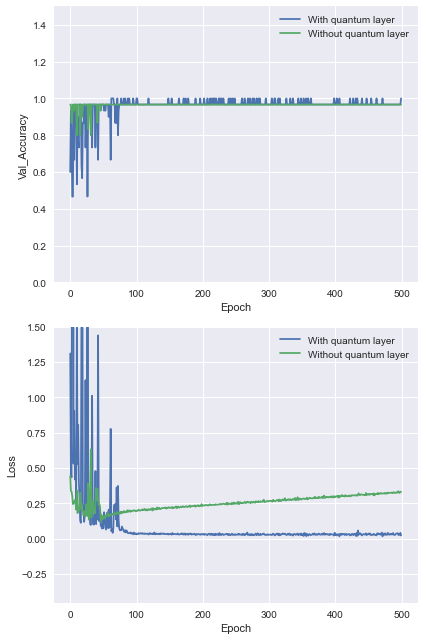

In [200]:
import matplotlib.pyplot as plt

plt.style.use("seaborn")
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 9))

ax1.plot(q_history.history["val_accuracy"], label="With quantum layer")
ax1.plot(c_history.history["val_accuracy"], label="Without quantum layer")
ax1.set_ylabel("Val_Accuracy")
ax1.set_ylim([0, 1.5])
ax1.set_xlabel("Epoch")
ax1.legend()

ax2.plot(q_history.history["val_loss"], label="With quantum layer")
ax2.plot(c_history.history["val_loss"], label="Without quantum layer")
ax2.set_ylabel("Loss")
ax2.set_ylim(top=1.5)
ax2.set_xlabel("Epoch")
ax2.legend()

plt.tight_layout()

plt.show()

In [201]:
score_q = q_model.evaluate(q_test_images, test_labels, verbose=0)
test_lab_pr = q_model.predict(q_test_images)
prd_q_lab   = len(test_lab_pr) * [0]
for i in range(len(test_lab_pr)):
    if test_lab_pr[i][1] > 0.75:
        prd_q_lab[i] = 1
dict(zip(q_model.metrics_names, score_q))
print(test_lab_pr)

[[9.9999988e-01 6.7890277e-08]
 [1.0000000e+00 1.3650321e-08]
 [1.0000000e+00 1.3650321e-08]
 [1.0000000e+00 1.2533393e-14]
 [1.0000000e+00 1.7121707e-22]
 [1.0000000e+00 1.7121707e-22]
 [1.0000000e+00 2.9878896e-13]
 [1.0000000e+00 2.9878896e-13]
 [1.4515705e-08 1.0000000e+00]
 [1.3426263e-06 9.9999869e-01]
 [9.9999928e-01 6.8378375e-07]
 [1.5349606e-08 1.0000000e+00]
 [1.2361448e-06 9.9999881e-01]
 [9.9999988e-01 6.7890277e-08]
 [4.7327393e-07 9.9999952e-01]
 [1.0000000e+00 3.0240677e-09]
 [2.8167394e-04 9.9971825e-01]
 [1.0000000e+00 9.1772692e-12]
 [7.9906667e-06 9.9999201e-01]
 [1.0000000e+00 9.1772692e-12]
 [9.9999928e-01 6.8378375e-07]
 [1.0000000e+00 1.2533393e-14]
 [1.0000000e+00 3.0240677e-09]
 [3.3736467e-02 9.6626353e-01]]


In [202]:
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.metrics import precision_recall_fscore_support
print(test_labels)
print(prd_q_lab)
qcm = confusion_matrix(test_labels, prd_q_lab)
tn, fp, fn, tp = qcm.ravel()
print(tn,fp,fn,tp)
q_scr = precision_recall_fscore_support(test_labels, prd_q_lab ) # , average='binary',labels=[0])
print(q_scr)
f1_score(test_labels, prd_q_lab, average=None)


[0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 0 0 0 1]
[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1]
16 0 0 8
(array([1., 1.]), array([1., 1.]), array([1., 1.]), array([16,  8]))


array([1., 1.])

In [203]:
score_c = c_model.evaluate(test_images, test_labels, verbose=0)
test_lab_pr2= c_model.predict(test_images)
prd_c_lab   = len(test_lab_pr2) * [0]
for i in range(len(test_lab_pr2)):
    if test_lab_pr2[i][1] > 0.75:
        prd_c_lab[i] = 1
dict(zip(c_model.metrics_names, score_c))
print(test_lab_pr2)

[[1.0000000e+00 2.4150335e-09]
 [1.0000000e+00 2.0074942e-09]
 [1.0000000e+00 2.0074942e-09]
 [1.0000000e+00 1.9924072e-13]
 [1.0000000e+00 5.1161164e-17]
 [1.0000000e+00 5.1161164e-17]
 [1.0000000e+00 2.0776481e-13]
 [1.0000000e+00 2.0776481e-13]
 [6.1139693e-10 1.0000000e+00]
 [1.4614326e-08 1.0000000e+00]
 [1.0000000e+00 2.8568470e-08]
 [4.9435239e-10 1.0000000e+00]
 [4.7714761e-09 1.0000000e+00]
 [1.0000000e+00 2.4150335e-09]
 [2.3774840e-08 1.0000000e+00]
 [1.0000000e+00 9.2582236e-10]
 [6.6839148e-06 9.9999332e-01]
 [1.0000000e+00 4.6971715e-12]
 [1.9522555e-07 9.9999976e-01]
 [1.0000000e+00 4.6971715e-12]
 [1.0000000e+00 2.8568470e-08]
 [1.0000000e+00 1.9924072e-13]
 [1.0000000e+00 9.2582236e-10]
 [7.5261183e-02 9.2473882e-01]]


In [204]:
print(test_labels)
print(prd_c_lab)
ccm = confusion_matrix(test_labels, prd_c_lab)
tn, fp, fn, tp = ccm.ravel()
print(tn,fp,fn,tp)
c_scr = precision_recall_fscore_support(test_labels, prd_c_lab ) # , average='binary',labels=[0])
print(c_scr)
f1_score(test_labels, prd_c_lab, average=None)

[0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 0 0 0 1]
[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1]
16 0 0 8
(array([1., 1.]), array([1., 1.]), array([1., 1.]), array([16,  8]))


array([1., 1.])

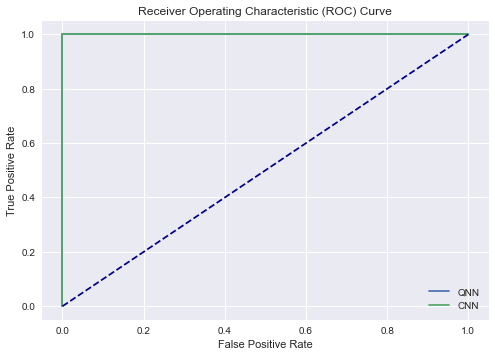

In [205]:
from sklearn.metrics import roc_curve
def plot_roc_curve(fper, tper, lab):
    for j in range(len(fper)):
        plt.plot(fper[j], tper[j], label=lab[j])
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

fper, tper, thresholds = roc_curve(test_labels, test_lab_pr[:,1]) 
fper2,tper2,thresholds = roc_curve(test_labels, test_lab_pr2[:,1]) 
plot_roc_curve([fper,fper2], [tper,tper2],['QNN','CNN'])